In [47]:
import pandas as pd
import pickle as pkl

## Looking at direct impact

In [4]:
# Load all samples impacts:
combined_df = pd.read_parquet("../outputs/meta_df_impact.parquet")
combined_df["number of events"] = combined_df.groupby("sample")["step"].transform("count")

#### combined_df: all TC in one dataframe

Each row is a TC

- step: step of occurrence of event
- total_damage: total secs_exp destroyed (ie productive capital)
- affected: list regions affected by the event
- max_shock_intensity: max(damage/sec_exps) across all regions (ie highest share of production capacity lost due to event) -> replaced by mean 
- max_shock_intensity_pct: same but *100 (expressed as % lost) -> replaced by mean
- recovery_duration: length of recovery duration goal (is a function of max_shock_intensity)
- sample: sample id
- MRIOT: MRIOT used
- number of events : total number of TCs in the sample of the TC looked at

In [59]:
combined_df

step  total_damage              affected  max_shock_intensity  \
5218     0  2.835784e+09                 [JPN]                  NaN   
5219     8  4.344727e+08       [CHN, PHL, ROW]                  NaN   
5220    57  1.208093e+09            [CHN, PHL]                  NaN   
5221    91  2.025782e+09  [ESP, FRA, PRT, ROW]                  NaN   
5222    92  1.053790e+09                 [ROW]                  NaN   
...    ...           ...                   ...                  ...   
4415  1413  3.072319e+08       [CHN, JPN, TWN]                  NaN   
4416  1430  1.262911e+10       [CHN, HKG, PHL]                  NaN   
4417  1435  2.176910e+09            [ROW, USA]                  NaN   
4418  1457  1.012324e+10            [CHN, TWN]                  NaN   
4419  1460  3.774942e+08            [ROW, USA]                  NaN   

      max_shock_intensity_pct  recovery_duration  sample        MRIOT  \
5218                      NaN                 83       0  OECD21-2018   
5219                      NaN                 50       0  OECD21-2018   
5220                      NaN                528       0  OECD21-2018   
5221                      NaN                 60       0  OECD21-2018   
5222                      NaN                 65       0  OECD21-2018   
...                       ...                ...     ...          ...   
4415                      NaN                 60      99  OECD21-2018   
4416                      NaN                127      99  OECD21-2018   
4417                      NaN                 51      99  OECD21-2018   
4418                      NaN                247      99  OECD21-2018   
4419                      NaN                 48      99  OECD21-2018   

      mean_shock_intensity  mean_shock_intensity_pct  number of events  
5218              0.000150                  0.015000                29  
5219              0.000014                  0.001414                29  
5220              0.000778                  0.077760                29  
5221              0.000062                  0.006189                29  
5222              0.000084                  0.008379                29  
...                    ...                       ...               ...  
4415              0.000061                  0.006078                28  
4416              0.000269                  0.026903                28  
4417              0.000017                  0.001665                28  
4418              0.000471                  0.047098                28  
4419              0.000003                  0.000289                28  

[2800 rows x 11 columns]

To look at a specific sample:

In [60]:
combined_df.loc[(combined_df["sample"]==62)]

step  total_damage                        affected  max_shock_intensity  \
3678     0  9.145305e+08                      [CHN, TWN]                  NaN   
3679     5  6.335145e+08                           [USA]                  NaN   
3680    26  3.247540e+08                      [JPN, TWN]                  NaN   
3681   377  2.772849e+08                           [MEX]                  NaN   
3682   399  3.841113e+09                      [JPN, KOR]                  NaN   
3683   431  8.201996e+08                      [JPN, KOR]                  NaN   
3684   457  3.306893e+08                           [USA]                  NaN   
3685   714  5.419305e+08                      [JPN, KOR]                  NaN   
3686   717  5.934624e+08                      [CHN, PHL]                  NaN   
3687   741  3.337147e+09            [CHN, JPN, ROW, TWN]                  NaN   
3688   749  4.999328e+08                 [CHN, LAO, VNM]                  NaN   
3689   783  1.394458e+10  [CHN, JPN, PHL, ROW, RUS, TWN]                  NaN   
3690   786  1.148840e+09            [CHN, HKG, PHL, VNM]                  NaN   
3691   821  1.895544e+09                 [LAO, PHL, VNM]                  NaN   
3692  1043  1.447048e+09            [CHN, HKG, PHL, TWN]                  NaN   
3693  1102  6.537110e+09                      [ROW, USA]                  NaN   
3694  1118  1.058933e+11                           [USA]                  NaN   
3695  1140  3.280577e+10                      [CHN, JPN]                  NaN   
3696  1142  1.449157e+09                           [JPN]                  NaN   
3697  1145  8.698156e+09                 [CAN, ROW, USA]                  NaN   
3698  1425  9.236123e+08                 [CHN, HKG, PHL]                  NaN   
3699  1505  6.397805e+08                           [USA]                  NaN   
3700  1529  7.331230e+09                 [CHN, JPN, TWN]                  NaN   
3701  1557  8.675595e+08                           [ROW]                  NaN   

      max_shock_intensity_pct  recovery_duration  sample        MRIOT  \
3678                      NaN                109      62  OECD21-2018   
3679                      NaN                 49      62  OECD21-2018   
3680                      NaN                 72      62  OECD21-2018   
3681                      NaN                 63      62  OECD21-2018   
3682                      NaN                119      62  OECD21-2018   
3683                      NaN                 61      62  OECD21-2018   
3684                      NaN                 48      62  OECD21-2018   
3685                      NaN                 56      62  OECD21-2018   
3686                      NaN                 49      62  OECD21-2018   
3687                      NaN                 53      62  OECD21-2018   
3688                      NaN                 49      62  OECD21-2018   
3689                      NaN                 66      62  OECD21-2018   
3690                      NaN                 49      62  OECD21-2018   
3691                      NaN                850      62  OECD21-2018   
3692                      NaN                 59      62  OECD21-2018   
3693                      NaN                 57      62  OECD21-2018   
3694                      NaN                970      62  OECD21-2018   
3695                      NaN                194      62  OECD21-2018   
3696                      NaN                 63      62  OECD21-2018   
3697                      NaN                 60      62  OECD21-2018   
3698                      NaN                 66      62  OECD21-2018   
3699                      NaN                 49      62  OECD21-2018   
3700                      NaN                978      62  OECD21-2018   
3701                      NaN                 62      62  OECD21-2018   

      mean_shock_intensity  mean_shock_intensity_pct  number of events  
3678              0.000224                  0.022421                24  
3679    

### Some stats on direct impacts

#### Inter Event Time (days) distribution per sample
Large graph (100 facets)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate inter-event time differences
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Create a facet grid of histograms by sample
g = sns.FacetGrid(df, col="sample", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.histplot, x="time_diff", bins=20, edgecolor="black")
g.set_titles("Sample {col_name}")
g.set_axis_labels("Inter-Event Time (days)", "Frequency")
g.tight_layout()
plt.show()

#### Inter event time and max shock intensity stats

In [ ]:
import pandas as pd

# Calculate inter-event time differences
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Group by sample and calculate summary statistics
summary_df = df.groupby("sample").agg({
    "time_diff": ["mean", "std", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)],
    "max_shock_intensity": ["mean", "std", "median", lambda x: x.quantile(0.75) - x.quantile(0.25)]
}).reset_index()

summary_df.columns = ['sample', 'time_diff_mean', 'time_diff_std', 'time_diff_median', 'interquartile_difference_time_diff',
                     'max_shock_intensity_mean', 'max_shock_intensity_std', 'max_shock_intensity_median', 'interquartile_difference_max_shock_intensity']

# Display the summary statistics
summary_df

#### Some Normalised measure of time diff and intensity

In [ ]:
import numpy as np
import pandas as pd

# Assuming df contains the relevant data
df = combined_df.copy()
df["time_diff"] = df.groupby("sample")["step"].diff()

df = df.dropna()
df = df[df["time_diff"] > 0]

# Normalize the variables
df["normalized_time_diff"] = (df["time_diff"] - df["time_diff"].min()) / (df["time_diff"].max() - df["time_diff"].min())
df["normalized_intensity"] = (df["max_shock_intensity"] - df["max_shock_intensity"].min()) / (df["max_shock_intensity"].max() - df["max_shock_intensity"].min())

# Define weights (e.g., 0.6 for inter-event time and 0.4 for intensity)
weight_time_diff = 0.5
weight_intensity = 0.5

# Calculate the weighted average
df["combined_measure"] = (weight_time_diff * df["normalized_time_diff"]) + (weight_intensity * df["normalized_intensity"])

# Group by sample and calculate the average combined measure
sample_characteristics = df.groupby("sample")["combined_measure"].mean().reset_index()

# Display the sample characteristics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a facet grid of histograms by sample
g = sns.FacetGrid(df, col="sample", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.histplot, x="combined_measure", bins=20, edgecolor="black")
g.set_titles("Sample {col_name}")
g.set_axis_labels("Inter-Event Time (days) x Intensity", "Frequency")
g.tight_layout()
plt.show()

#### Max intensity per sample

In [ ]:
df = combined_df.copy()
df.sort_values(["max_shock_intensity_pct"],inplace=True)
sorted_samples = df.groupby("sample")["max_shock_intensity_pct"].mean().sort_values().index

plt.figure(figsize=(16, 7))
sns.boxplot(data=df, x="sample", y="max_shock_intensity_pct", order=sorted_samples)
plt.title("Distribution of Max Shock Intensity Percentage by Sample")
plt.xlabel("Sample")
plt.ylabel("Max Shock Intensity Percentage")
plt.tight_layout()
plt.show()

#### Number of events with max intensity > 0.01% of capital destroyed

In [ ]:
# Convert affected regions to individual rows
df = combined_df.copy()
affected_df = df.explode("affected")

# Filter high max_shock_intensity events (example threshold: 0.01)
high_intensity_df = affected_df[affected_df["max_shock_intensity_pct"] > 0.01]

# Calculate the count of high-intensity events for each region
sample_region_counts = high_intensity_df.groupby(["sample", "affected"]).size().unstack(fill_value=0)
sample_region_counts.loc[:,"All Regions"] = sample_region_counts.sum(axis=1)
sample_region_counts.loc["All samples",:] = sample_region_counts.sum(axis=0)
sample_region_counts=sample_region_counts.T
sample_region_counts = sample_region_counts.astype(int)
sample_region_counts.sort_values(axis=1,by="All Regions",inplace=True,ascending=False)
sample_region_counts.sort_values(axis=0,by="All samples",inplace=True,ascending=False)

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(data=sample_region_counts.drop("All samples",axis=1).drop("All Regions"), cmap="YlOrRd", annot=True, fmt="d")
plt.title("Regions Affected by Events with > 0.01% ")
plt.xlabel("Sample")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## Indirect impacts results

### Setting up data

At the moment recent results are with OECD21 (more countries in west pacific)

In [48]:
mriot_name = "OECD21"

In [53]:
def add_europe(df,EU_regs):
    if "sector" in df.index.names:
        df.loc["Europe"] = df.loc[EU_regs].groupby("sector").sum()
    else:
        df.loc["Europe"] = df.loc[EU_regs].sum()
    return df

def get_affected_regions(group):
    affected_regions = group.loc[group["total direct impact"] > 0, ["region", "total direct impact"]]
    sorted_regions = affected_regions.sort_values(by="total direct impact", ascending=False)["region"].unique()
    return pd.Series({"affected regions": sorted_regions})

EU_regs_exio = ["AT","BE","BG","CH","DE","DK","EE","ES","FI","FR","GB","GR","HR","HU","IE","IT","LT","LU","LV","MT","NL","NO","PL","PT","RO","SE","SI","SK"]
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]

if mriot_name == "OECD21":
    EU_regs = EU_regs_wiod
    with open("../outputs/OECD21-2018.pkl",'rb') as f:
        mriot = pkl.load(f)
else:
    EU_regs = EU_regs_exio
    with open("../outputs/EXIOBASE3-2010.pkl",'rb') as f:
        mriot = pkl.load(f)

VA_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
production_df = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
final_demand_df = mriot.Y.sum(axis=0).groupby("region").sum()

production_df = add_europe(production_df,EU_regs)
final_demand_df = add_europe(final_demand_df,EU_regs)

res_df = pd.read_parquet("../outputs/results_meta_df.parquet")
res_df = res_df.reset_index()

###################################################################################################################################################################
# The following lines sets the values for production_losses from production_realised such that positive values are production LOSSES and negative values are gains #
###################################################################################################################################################################
res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"] = res_df.loc[(res_df["variable"]=="production_realised"),"total indirect impact"] * -1 # Positives == losses
res_df.replace(to_replace="production_realised", value="production_losses", inplace=True)

res_df["sample total direct damage"] = res_df.groupby(["sample","MRIOT","invtype","simtype","variable"])["total direct impact"].transform("sum")
affected_regions_df = res_df.groupby(["sample", "MRIOT", "invtype", "simtype", "variable"]).apply(get_affected_regions)
#affected_regions_df
res_df = res_df.groupby(["sample","MRIOT","invtype","simtype","variable", "region"])[["total direct impact","total indirect impact","sample total direct damage"]].agg(
    {"total direct impact":"sum",
     "total indirect impact":"sum",
     "sample total direct damage":"first"}).reset_index()
res_df = res_df.merge(affected_regions_df, left_on=["sample", "MRIOT", "invtype", "simtype", "variable"], right_index=True)
# List of regions


# custom aggregation to handle the affected regions
grouped = res_df.loc[res_df.region.isin(EU_regs)].groupby(["sample", "MRIOT", "invtype", "simtype", "variable"]).agg({
    "region": lambda x: "Europe",  # Set region to "Europe"
    "total direct impact": "sum",   # Sum total direct impact
    "total indirect impact": "sum",  # Sum total indirect impact
    "sample total direct damage": "first",  # Sum sample total direct damage
    "affected regions": "first"  # Use the first value of affected regions
}).reset_index()

# Display the updated DataFrame
res_df = pd.concat([res_df, grouped], ignore_index=True)
# Create a mask to filter rows where variable is "final_demand_unmet" or "production_losses"
mask = (res_df["variable"] == "final_demand_unmet") | (res_df["variable"] == "production_losses")

# Calculate 'relative indirect impact' based on variable
res_df.loc[mask, 'relative indirect impact'] = res_df.loc[mask, 'total indirect impact'] / res_df.loc[mask, 'region'].map(final_demand_df if 'final_demand_unmet' in res_df['variable'].values else production_region_df.groupby('region').sum())

dir_imp_df = combined_df[["sample","recovery_duration","mean_shock_intensity","number of events"]].groupby("sample",as_index=False).agg(
    {"recovery_duration":"sum",
     "mean_shock_intensity":"mean",
     "number of events":"first"
    })

res_df = res_df.merge(dir_imp_df, how="left", on="sample")

#### res_df
- sample : sample id
- MRIOT : MRIOT used for simulation
- invtype : type of inventory "scenario" use (example: 90-60 is 90 days stocks, 60 days rate)
- simtype : aggregated is all events taken together, separated is all events isolated then summed
- variable : variables looked at (e.g. production realised shows the cumulated difference between actual production during the simulation and initial production (*positive values are losses*))
- region : is the region looked at
- total direct impact : total direct impact (in the region) **/!\ in €**
- total indirect impact : total indirect impact (in the region) (the value of "variable") **/!\ in M€**
- sample total direct damage : total direct impact for the whole sample **/!\ in €**
- affected regions : all regions affected by at least one event **sorted by direct impact**.
- relative indirect impact : indirect loss relative to yearly output or final demand (Say total production losses in 1M€ and yearly production is 100M€ then relative indirect impact = 1/100 = 0.01)
- recovery_duration : sum of all recovery duration (has no real meaning)
- mean_shock_intensity : average of the "mean shock intensity of all TCs" of the sample
- number of events : total number of event of the sample 

In [54]:
res_df

sample        MRIOT invtype     simtype            variable  region  \
0           0  OECD21-2018     9-6  aggregated  final_demand_unmet     ARG   
1           0  OECD21-2018     9-6  aggregated  final_demand_unmet     AUS   
2           0  OECD21-2018     9-6  aggregated  final_demand_unmet     AUT   
3           0  OECD21-2018     9-6  aggregated  final_demand_unmet     BEL   
4           0  OECD21-2018     9-6  aggregated  final_demand_unmet     BGR   
...       ...          ...     ...         ...                 ...     ...   
54395      99  OECD21-2018     9-6   separated   production_losses  Europe   
54396      99  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54397      99  OECD21-2018   90-60  aggregated   production_losses  Europe   
54398      99  OECD21-2018   90-60   separated  final_demand_unmet  Europe   
54399      99  OECD21-2018   90-60   separated   production_losses  Europe   

       total direct impact  total indirect impact  sample total direct damage  \
0             0.000000e+00             100.439311                3.399802e+11   
1             0.000000e+00             399.129772                3.399802e+11   
2             0.000000e+00             186.551288                3.399802e+11   
3             0.000000e+00             244.761653                3.399802e+11   
4             0.000000e+00              42.924767                3.399802e+11   
...                    ...                    ...                         ...   
54395         2.047022e+10            4238.537108                1.241315e+11   
54396         2.047022e+10           14159.802808                1.241315e+11   
54397         2.047022e+10           -1592.310467                1.241315e+11   
54398         2.047022e+10           19037.084599                1.241315e+11   
54399         2.047022e+10            3467.196030                1.241315e+11   

                                        affected regions  \
0      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
1      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
2      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
3      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
4      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
...                                                  ...   
54395  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54396  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54397  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54398  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54399  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   

       relative indirect impact  recovery_duration  mean_shock_intensity  \
0                      0.000208               6502              0.000397   
1                      0.000297               6502              0.000397   
2                      0.000445               6502              0.000397   
3                      0.000455               6502              0.000397   
4                      0.000710               6502              0.000397   
...                         ...                ...                   ...   
54395                  0.000234               4505              0.000288   
54396                  0.000780               4505              0.000288   
54397                 -0.000088               4505              0.000288   
54398                  0.001049               4505              0.000288   
54399                  0.000191               4505              0.000288   

       number of events  
0                    29  
1                    29  
2                    29  
3                    29  
4                    29  
...                 ...  
54395                28  
54396                28  
54397                28  
54398                28  
54399                28  

[54400 rows x 14 columns]

In [61]:
# quick check
assert not res_df.isna().any().any()

### Looking at specific samples

- ```(res_df.region=="Europe") & (res_df["total direct impact"]==0)``` to look at indirect losses in Europe from events that did not affect Europe.
- ```.sort_values("relative indirect impact").iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]]``` to look at the most and least indirectly damaging events.

In [55]:
res_df.loc[(res_df.region=="Europe") & (res_df.variable=="production_losses") & (res_df["total direct impact"]==0)].sort_values("relative indirect impact").iloc[[0,1,2,3,4,5,6,7,-7,-6,-5,-4,-3,-2,-1]]

sample        MRIOT invtype     simtype            variable  region  \
54372      96  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54368      96  OECD21-2018     9-6  aggregated  final_demand_unmet  Europe   
53708      13  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
53704      13  OECD21-2018     9-6  aggregated  final_demand_unmet  Europe   
53824      28  OECD21-2018     9-6  aggregated  final_demand_unmet  Europe   
53828      28  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54132      66  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54044      55  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
54126      65  OECD21-2018   90-60   separated  final_demand_unmet  Europe   
53840      30  OECD21-2018     9-6  aggregated  final_demand_unmet  Europe   
53844      30  OECD21-2018   90-60  aggregated  final_demand_unmet  Europe   
53658       7  OECD21-2018     9-6   separated  final_demand_unmet  Europe   
53662       7  OECD21-2018   90-60   separated  final_demand_unmet  Europe   
53842      30  OECD21-2018     9-6   separated  final_demand_unmet  Europe   
53846      30  OECD21-2018   90-60   separated  final_demand_unmet  Europe   

       total direct impact  total indirect impact  sample total direct damage  \
54372                  0.0            1098.103771                6.345238e+10   
54368                  0.0            1167.582160                6.345238e+10   
53708                  0.0            1278.348340                5.559337e+10   
53704                  0.0            1321.561743                5.559337e+10   
53824                  0.0            1373.550458                6.061378e+10   
53828                  0.0            1396.888576                6.061378e+10   
54132                  0.0            2255.405433                1.201394e+11   
54044                  0.0            2295.674916                1.124010e+11   
54126                  0.0            8057.456495                2.135158e+11   
53840                  0.0            8580.603764                5.027296e+11   
53844                  0.0            9196.055367                5.027296e+11   
53658                  0.0           10866.226880                2.897467e+11   
53662                  0.0           11505.845742                2.897467e+11   
53842                  0.0           14101.864254                5.027296e+11   
53846                  0.0           15323.556549                5.027296e+11   

                                        affected regions  \
54372  [CHN, JPN, MEX, USA, ROW, TWN, PHL, VNM, HKG, ...   
54368  [CHN, JPN, MEX, USA, ROW, TWN, PHL, VNM, HKG, ...   
53708  [CHN, USA, JPN, ROW, KOR, PHL, TWN, VNM, MEX, ...   
53704  [CHN, USA, JPN, ROW, KOR, PHL, TWN, VNM, MEX, ...   
53824  [JPN, CHN, USA, TWN, VNM, ROW, CAN, MEX, PHL, ...   
53828  [JPN, CHN, USA, TWN, VNM, ROW, CAN, MEX, PHL, ...   
54132  [CHN, USA, JPN, TWN, ROW, VNM, HKG, KOR, PHL, ...   
54044  [USA, CHN, JPN, ROW, TWN, MEX, VNM, KOR, PHL, ...   
54126  [USA, CHN, MEX, ROW, JPN, TWN, KOR, VNM, CAN, ...   
53840  [USA, CHN, MEX, JPN, HKG, VNM, ROW, TWN, KOR, ...   
53844  [USA, CHN, MEX, JPN, HKG, VNM, ROW, TWN, KOR, ...   
53658  [CHN, USA, ROW, MEX, JPN, KOR, HKG, TWN, VNM, ...   
53662  [CHN, USA, ROW, MEX, JPN, KOR, HKG, TWN, VNM, ...   
53842  [USA, CHN, MEX, JPN, HKG, VNM, ROW, TWN, KOR, ...   
53846  [USA, CHN, MEX, JPN, HKG, VNM, ROW, TWN, KOR, ...   

       relative indirect impact  recovery_duration  mean_shock_intensity  \
54372                  0.000061               3210              0.000183   
54368                  0.000064               3210              0.000183   
53708                  0.000070               1931              0.000112   
53704                  0.000073               1931              0.000112   
53824                  0.000076               2819              0.000135   
53828                  0.000077             

### Renaming for nice plots
- Names for plots
- Correct units

In [69]:
clean_df = res_df.copy()

# Replace variable values
clean_df['variable'] = clean_df['variable'].replace({'production_losses': 'Production losses', 'final_demand_unmet': 'Final demand losses'})
clean_df['simtype'] = clean_df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
clean_df = clean_df.rename(columns={'total direct impact': 'Total direct impact (€ Billions)',
                                    'total indirect impact': 'Total indirect impact (€ Billions)',
                                    'sample total direct damage': 'Sample total direct impact (€ Billions)',
                                    'recovery_duration': 'Cumulated recovery time',
                                    'mean_shock_intensity': 'Mean sample shock intensity',
                                    'number of events': 'Sample number of events',
                                    'relative indirect impact' : 'Relative indirect impact',
                                    'variable':'Variable',
                                    'sample':'Sample',
                                    'region':'Region',
                                    'affected regions':'Affected regions'
                                   })
clean_df['Total direct impact (€ Billions)'] = clean_df['Total direct impact (€ Billions)'] / 1e9  # Divide by 10^9 as direct impact are in €
clean_df['Total indirect impact (€ Billions)'] = clean_df['Total indirect impact (€ Billions)'] / 1e3  # Divide by 10^3 as indirect impact are in M€
clean_df["Sample total direct impact (€ Billions)"] = clean_df["Sample total direct impact (€ Billions)"] / 1e9 # Divide by 10^9 as direct impact are in €
clean_df = clean_df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})
clean_df

Sample        MRIOT Inv. Scenario Event interaction ?  \
0           0  OECD21-2018           9-6                 Yes   
1           0  OECD21-2018           9-6                 Yes   
2           0  OECD21-2018           9-6                 Yes   
3           0  OECD21-2018           9-6                 Yes   
4           0  OECD21-2018           9-6                 Yes   
...       ...          ...           ...                 ...   
54395      99  OECD21-2018           9-6                  No   
54396      99  OECD21-2018         90-60                 Yes   
54397      99  OECD21-2018         90-60                 Yes   
54398      99  OECD21-2018         90-60                  No   
54399      99  OECD21-2018         90-60                  No   

                  Variable  Region  Total direct impact (€ Billions)  \
0      Final demand losses     ARG                          0.000000   
1      Final demand losses     AUS                          0.000000   
2      Final demand losses     AUT                          0.000000   
3      Final demand losses     BEL                          0.000000   
4      Final demand losses     BGR                          0.000000   
...                    ...     ...                               ...   
54395    Production losses  Europe                         20.470224   
54396  Final demand losses  Europe                         20.470224   
54397    Production losses  Europe                         20.470224   
54398  Final demand losses  Europe                         20.470224   
54399    Production losses  Europe                         20.470224   

       Total indirect impact (€ Billions)  \
0                                0.100439   
1                                0.399130   
2                                0.186551   
3                                0.244762   
4                                0.042925   
...                                   ...   
54395                            4.238537   
54396                           14.159803   
54397                           -1.592310   
54398                           19.037085   
54399                            3.467196   

       Sample total direct impact (€ Billions)  \
0                                   339.980165   
1                                   339.980165   
2                                   339.980165   
3                                   339.980165   
4                                   339.980165   
...                                        ...   
54395                               124.131488   
54396                               124.131488   
54397                               124.131488   
54398                               124.131488   
54399                               124.131488   

                                        Affected regions  \
0      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
1      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
2      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
3      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
4      [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   
...                                                  ...   
54395  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54396  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54397  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54398  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   
54399  [USA, CHN, JPN, IRL, TWN, PRT, ROW, GBR, NLD, ...   

       Relative indirect impact  Cumulated recovery time  \
0                      0.000208                     6502   
1                      0.000297                     6502   
2                      0.000445                     6502   
3                      0.000455                     6502   
4                      0.000710                     6502   
...                         ...                      ...   
54395                  0.000234                     4505   
54396                  0.00078

### Indirect Impact (Comparing aggregated events vs separated events)

#### Absolute losses

- Note that we use log and symlog scales
- symlog is for production losses as there are negative losses (ie gains) (otherwise we miss the data)
- change the ```variable = x ``` to either "Final demand losses" or "Production losses"
- change the ```inv_type = x ``` to either "9-6" or "90-60"
- you might want to further filter plot_df_europe with ```(plot_europe_df["total direct impact"]==0)```

<Figure size 640x480 with 0 Axes>

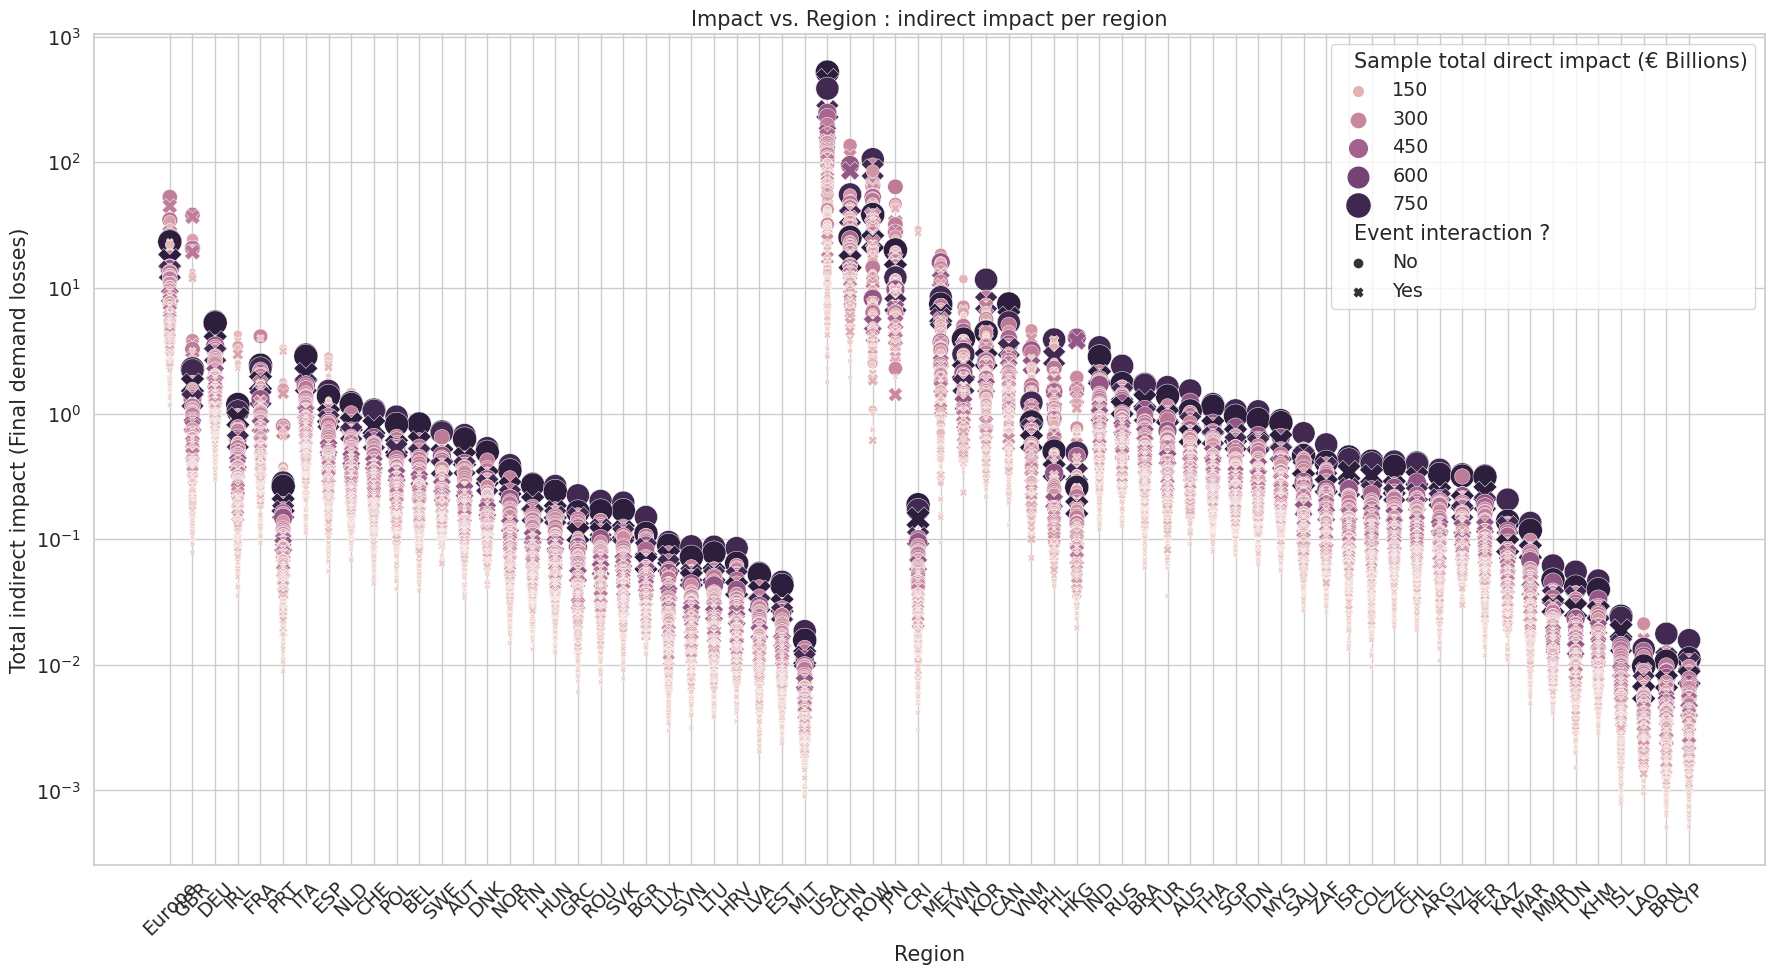

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
inv_type = "9-6"
y_value = "Total indirect impact (€ Billions)"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Event interaction ?"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Inv. Scenario"] == inv_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production losses":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

#### Losses relative to economy size

<Figure size 640x480 with 0 Axes>

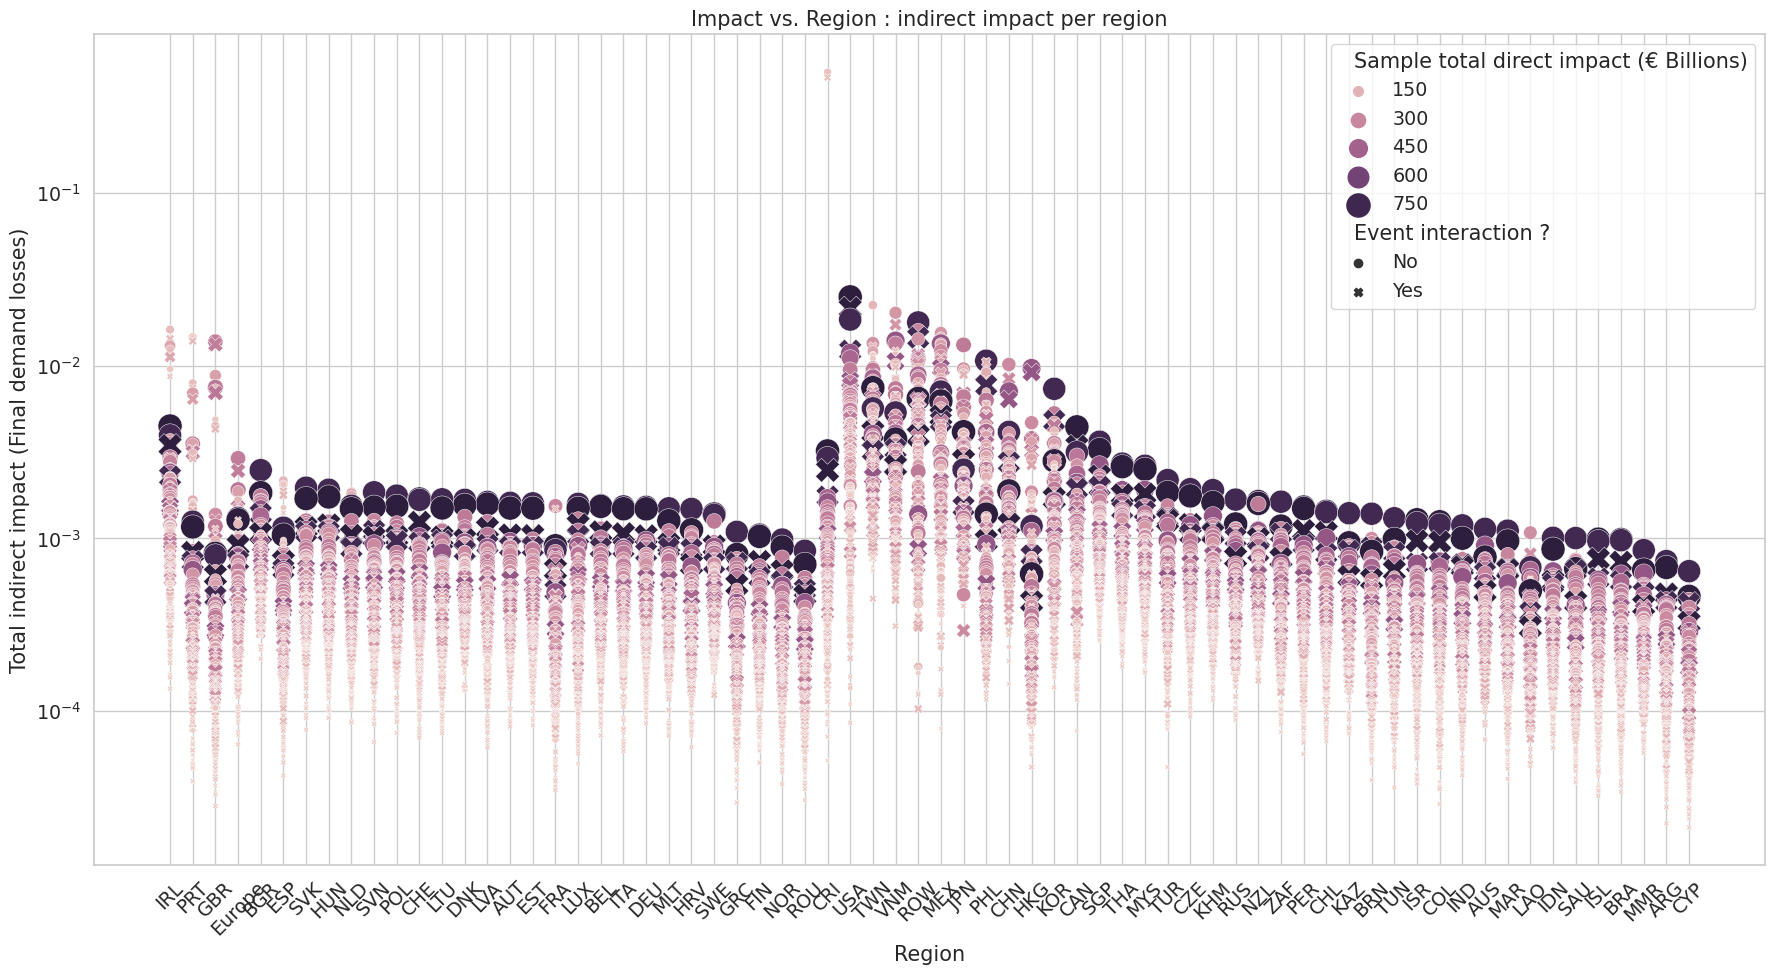

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
inv_type = "9-6"
y_value = "Relative indirect impact"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Event interaction ?"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Inv. Scenario"] == inv_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production losses":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

### Indirect Impact on production (Comparing 9-6 inventories vs 90-60)

#### Absolute production losses

<Figure size 640x480 with 0 Axes>

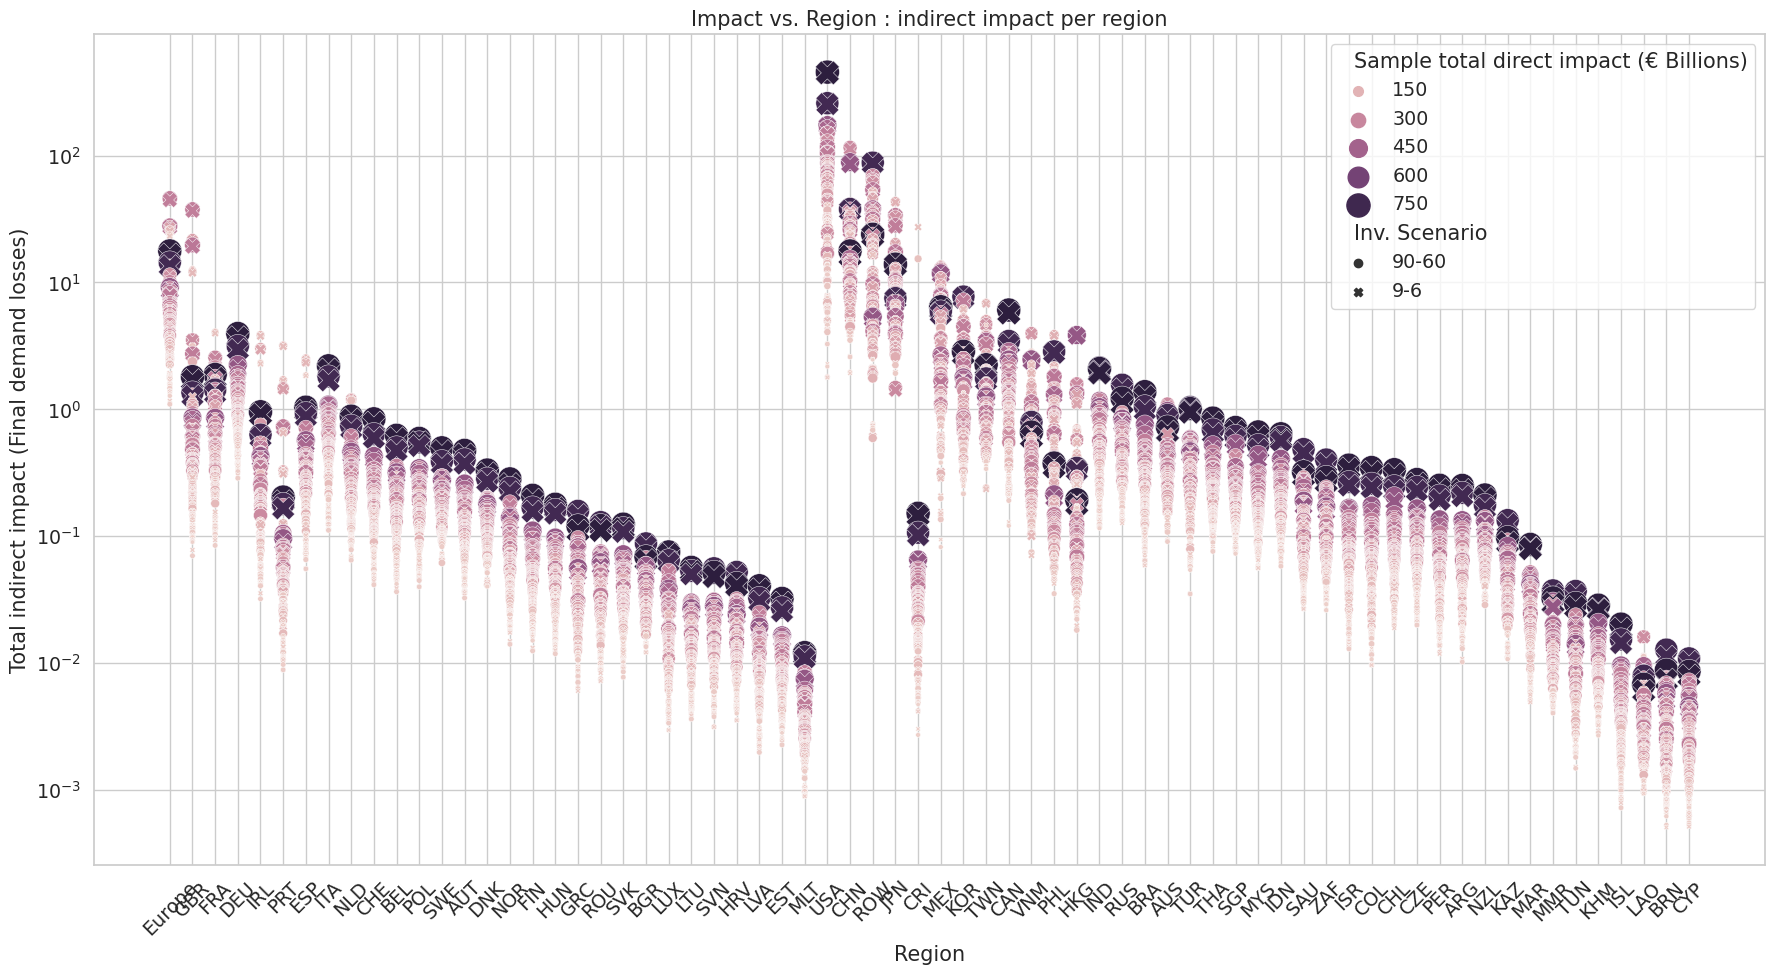

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
evnt_type = "Yes"
y_value = "Total indirect impact (€ Billions)"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Inv. Scenario"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Event interaction ?"] == evnt_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production losses":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

#### Production losses relative to regional yearly production

<Figure size 640x480 with 0 Axes>

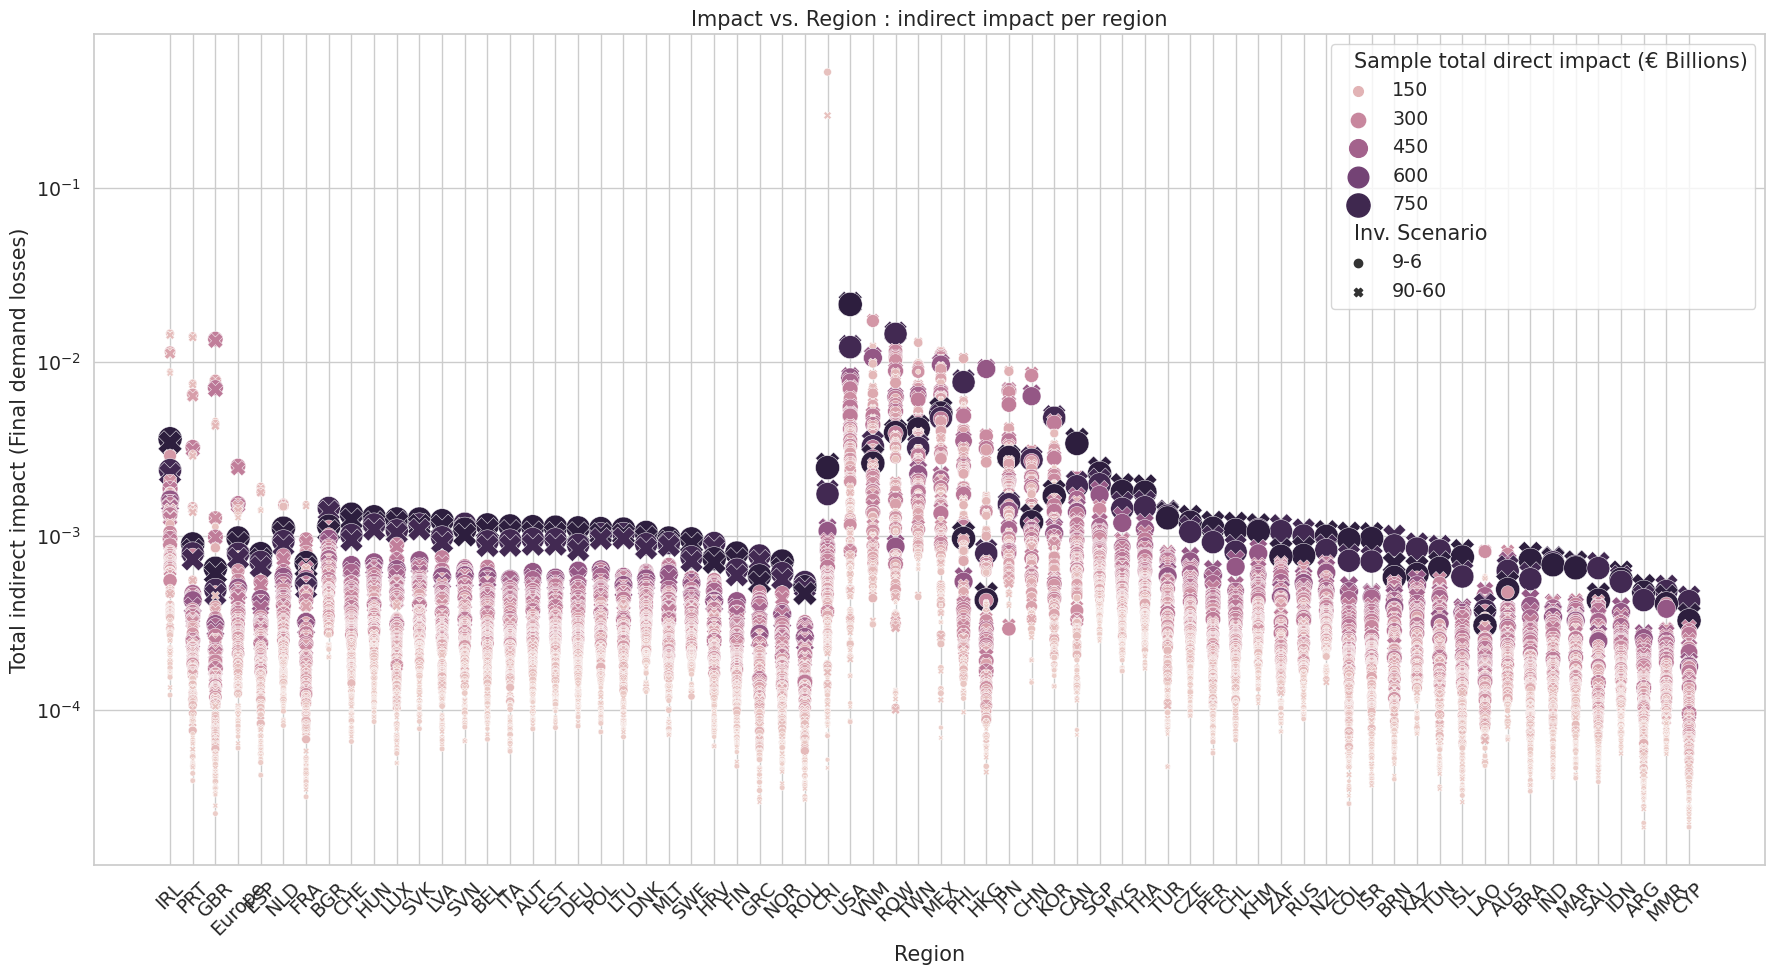

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

variable = "Final demand losses"
evnt_type = "Yes"
y_value = "Relative indirect impact"
hue_var = size_var = "Sample total direct impact (€ Billions)"
style_var = "Inv. Scenario"

plt.clf()
fig, ax = plt.subplots(figsize=(18, 10))

plot_df = clean_df.loc[(clean_df["Variable"] == variable) & (clean_df["Event interaction ?"] == evnt_type)].copy()
plot_df["Sample total direct impact (€ Billions)"] = plot_df["Sample total direct impact (€ Billions)"].apply(lambda x: max(1, x))  # Avoid log(0)

# Filter plot_df to include only regions from EU_regs
plot_df_europe = plot_df[(plot_df["Region"].isin(EU_regs)) | (plot_df["Region"]=="Europe")].sort_values(y_value, ascending=False)
plot_df = plot_df.loc[(~plot_df.Region.isin(EU_regs)) & (plot_df["Region"]!="Europe")].sort_values(y_value, ascending=False)

sns.scatterplot(data=plot_df_europe, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, legend=False, sizes=(10, 300), ax=ax)
sns.scatterplot(data=plot_df, x="Region", y=y_value, size=size_var, hue=hue_var, style=style_var, sizes=(10, 300), ax=ax)

plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel(f"Total indirect impact ({variable})")
plt.title("Impact vs. Region : indirect impact per region")
if variable=="Production losses":
    plt.yscale("symlog")
else:
    plt.yscale("log")
#plt.legend(title=f"Sample total direct damage (Billion)", ncols=3)
plt.tight_layout()
plt.show()

### Ranking regions

#### Direct impacts

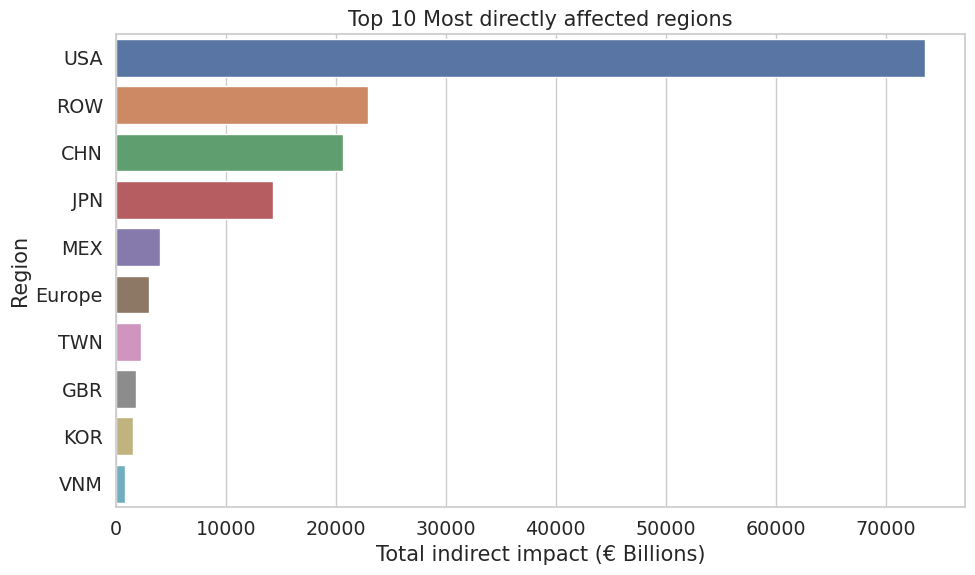

In [79]:
most_affected_regions = clean_df.groupby("Region")["Total direct impact (€ Billions)"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=most_affected_regions.values, y=most_affected_regions.index)
plt.xlabel("Total indirect impact (€ Billions)")
plt.ylabel("Region")
plt.title("Top 10 Most directly affected regions")
plt.tight_layout()
plt.show()

#### Absolute losses

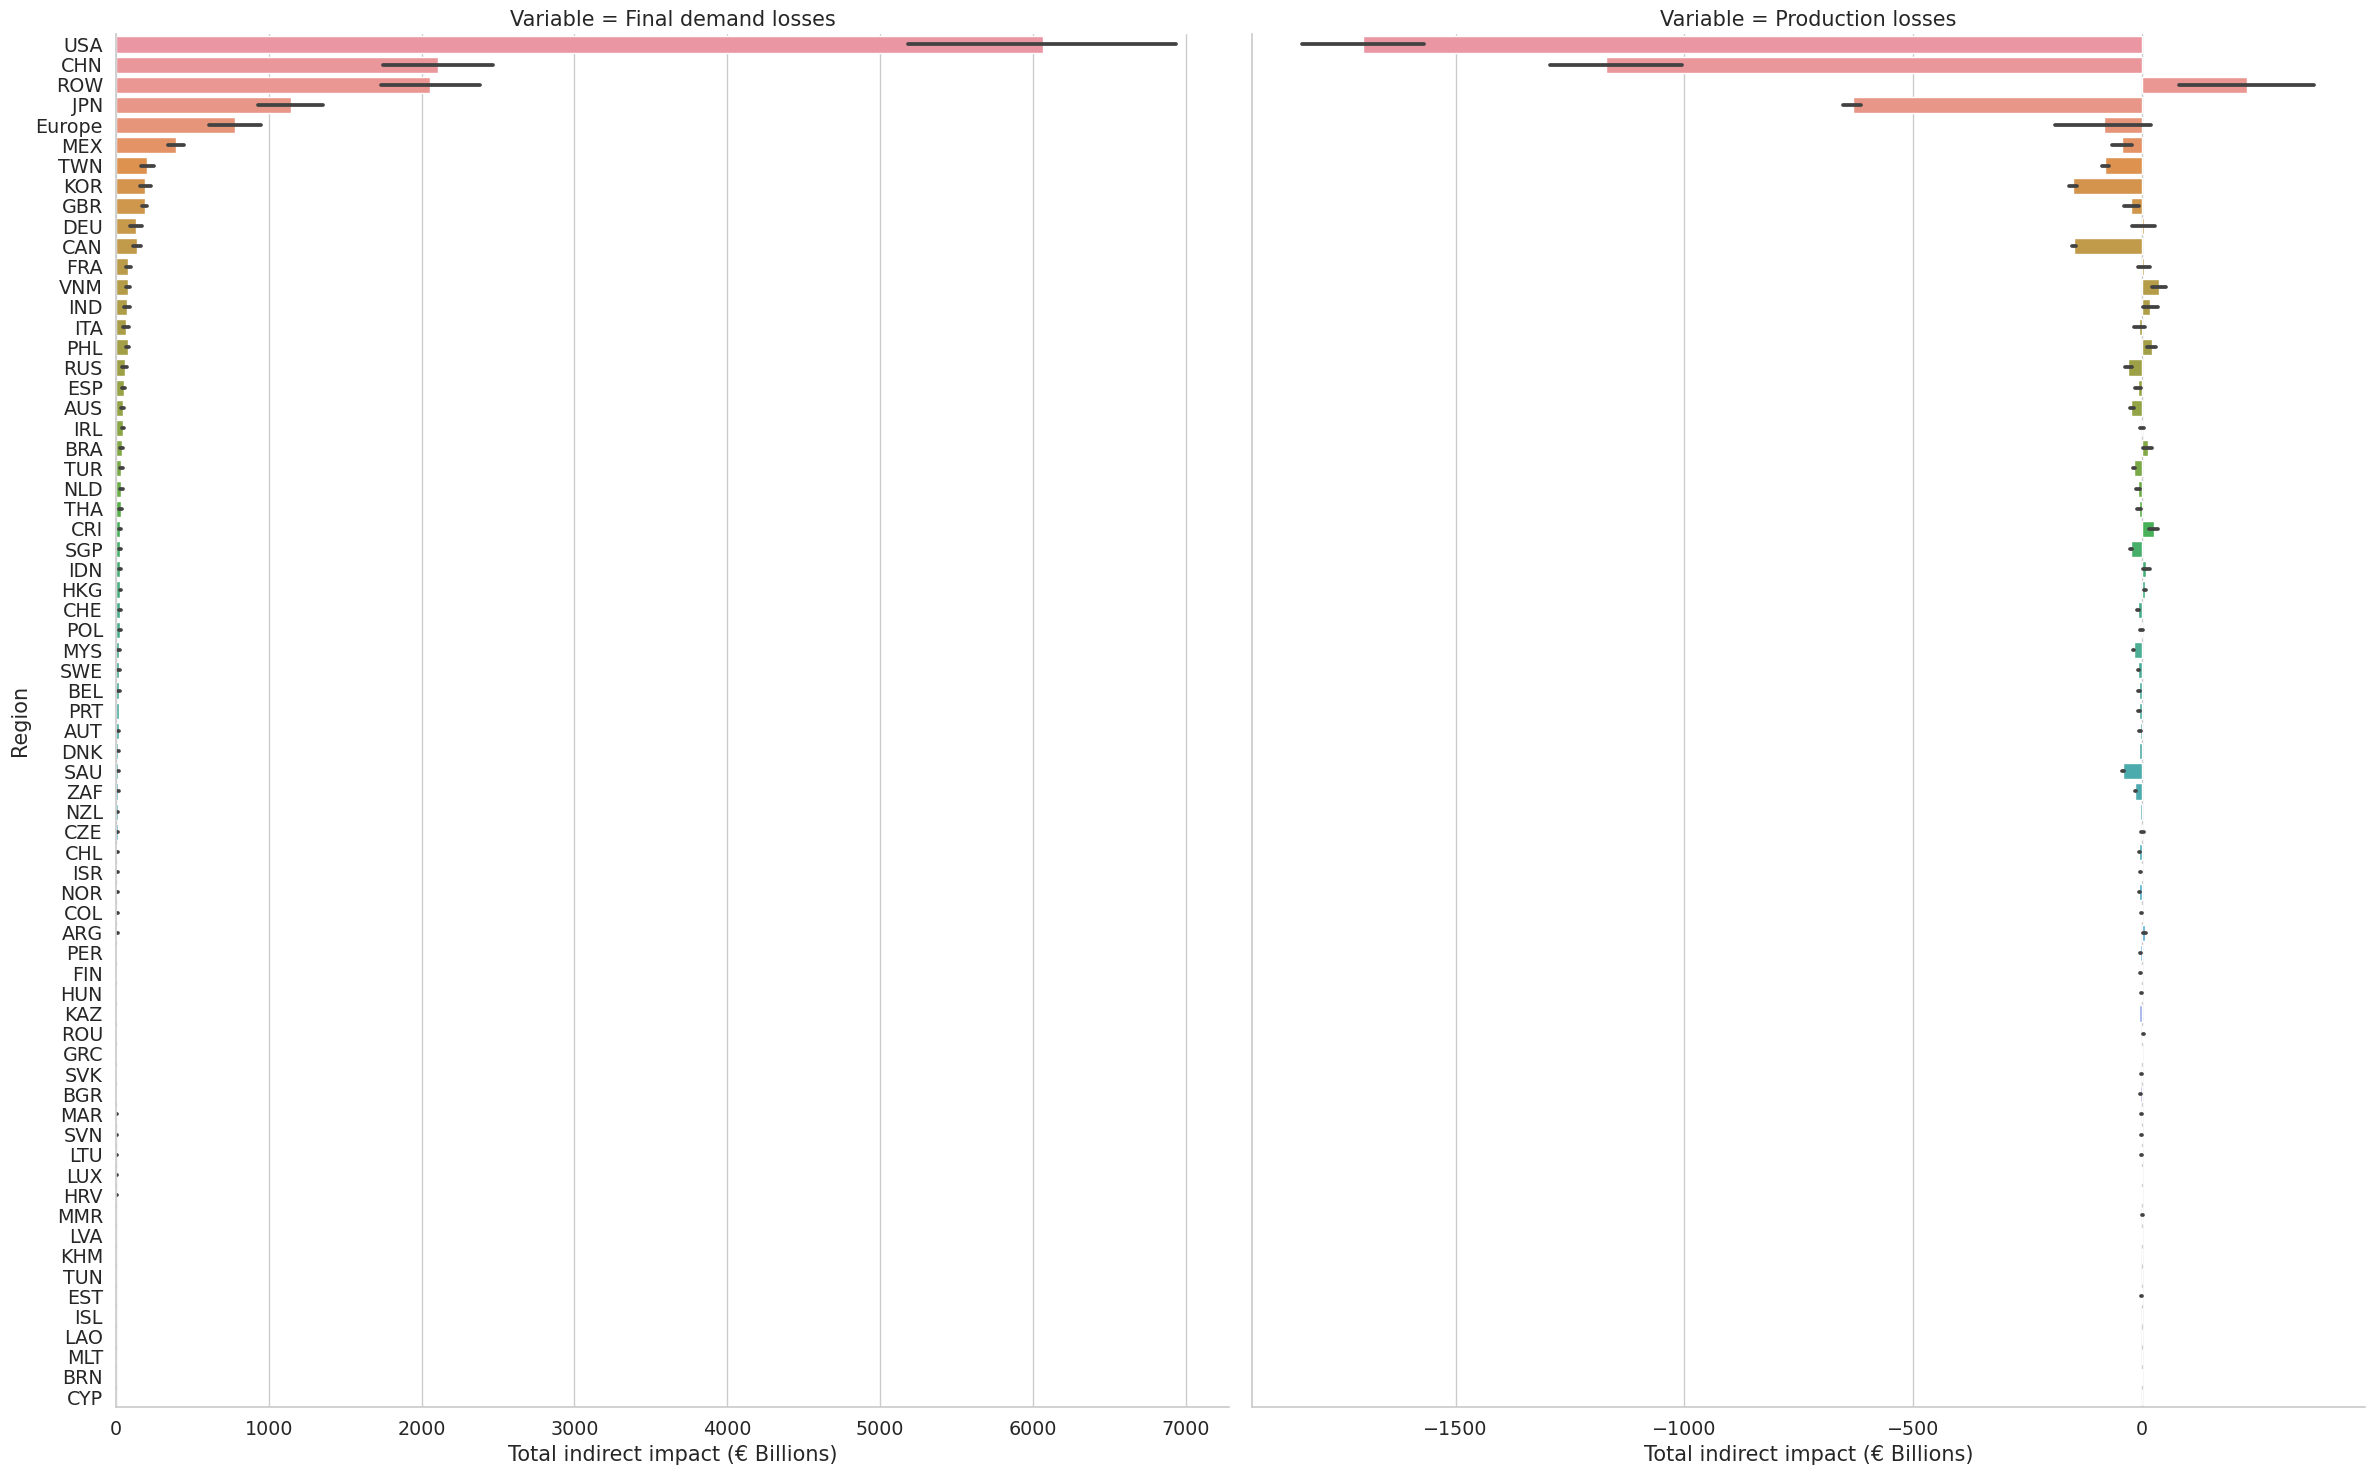

In [102]:
plot_df = clean_df.copy()

most_affected_regions = (plot_df.groupby(["Region",'Variable','Inv. Scenario','Event interaction ?'])["Total indirect impact (€ Billions)"].sum()).sort_values(ascending=False)
most_affected_regions = most_affected_regions.reset_index()
sns.catplot(most_affected_regions, kind="bar", x="Total indirect impact (€ Billions)", y="Region", col="Variable", sharex=False, height=15, aspect=0.8)

#### Relative indirect losses

Losses are expressed as the ratio of indirect losses / yearly production 

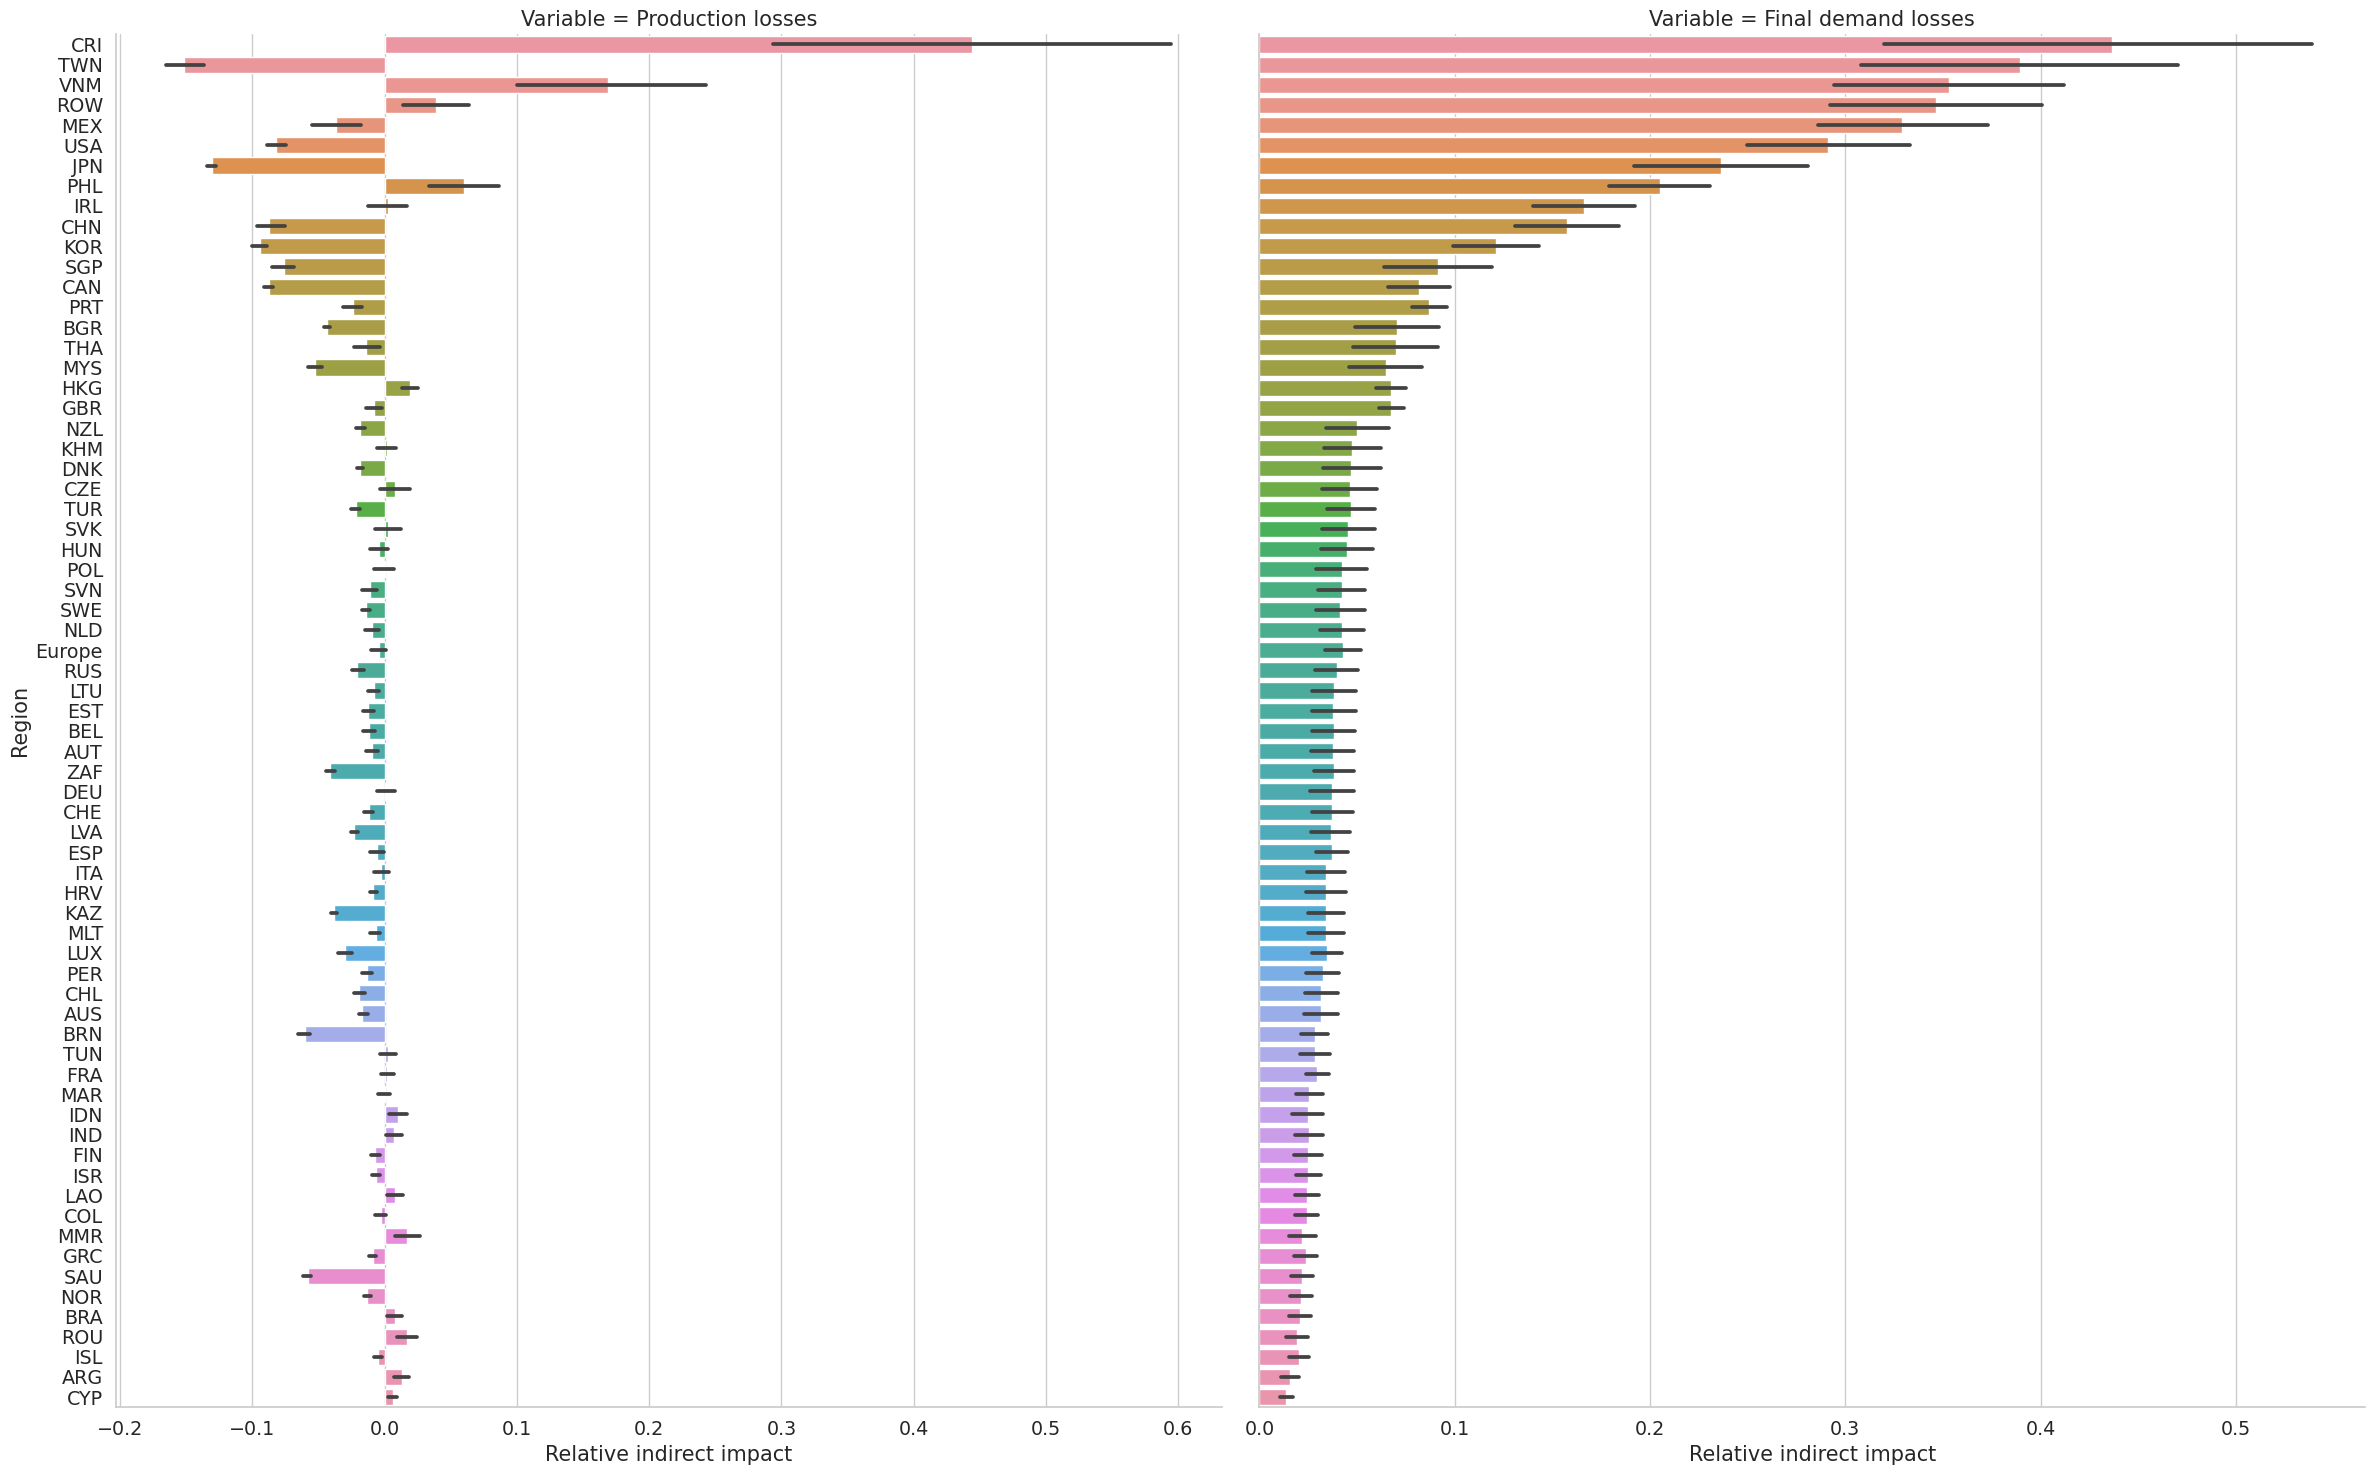

In [103]:
plot_df = clean_df.copy()

most_affected_regions = (plot_df.groupby(["Region",'Variable','Inv. Scenario','Event interaction ?'])["Relative indirect impact"].sum()).sort_values(ascending=False)
most_affected_regions = most_affected_regions.reset_index()
sns.catplot(most_affected_regions, kind="bar", x="Relative indirect impact", y="Region", col="Variable", sharex=False, height=15, aspect=0.8)

### Relative indirect impact vs Total Sample Direct Impact

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

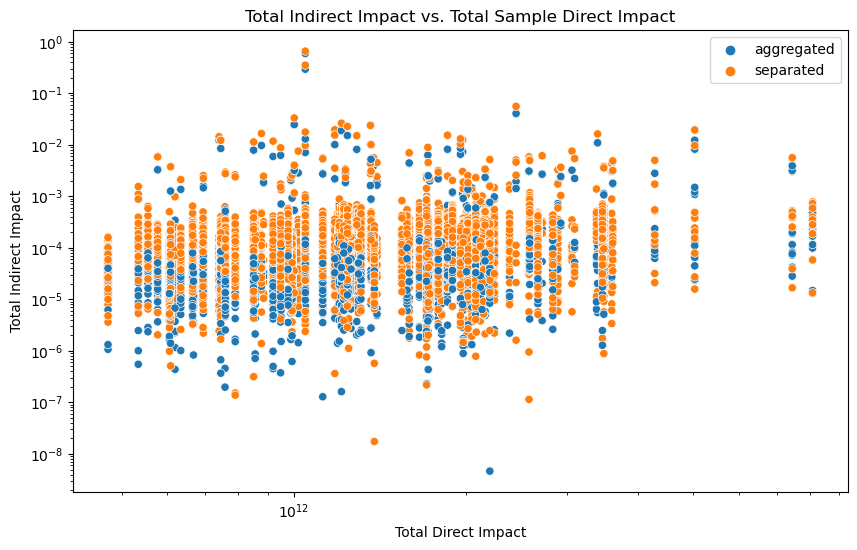

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = res_df.loc[(res_df.variable=="production_losses")].copy()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x="sample total direct damage", y="relative indirect impact", hue="simtype")
plt.xlabel("Total Direct Impact")
plt.ylabel("Total Indirect Impact")
plt.title("Total Indirect Impact vs. Total Sample Direct Impact")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

### Average indirect impact

Absolute

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_losses"].sort_values(by="total indirect impact", ascending=False).copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
sns.barplot(data=plot_df, y="region", x="total indirect impact", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average indirect impact")
plt.title("Average indirect impact by region")
plt.tight_layout()
plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

Relative

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_losses"].sort_values(by="relative indirect impact", ascending=False).copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
sns.barplot(data=plot_df, y="region", x="relative indirect impact", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average relative indirect impact")
plt.title("Average relative indirect impact by region")
plt.tight_layout()
plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

### Indirect damage over direct damage (sample) ratio

In [ ]:
plt.figure(figsize=(12, 20))
plot_df=res_df.loc[res_df.variable=="production_losses"].copy()
hue = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
plot_df["indirect damage over total sample damage"] = plot_df["total indirect impact"] / plot_df["sample total direct damage"]
plot_df.sort_values(by="indirect damage over total sample damage", ascending=False, inplace=True)
sns.barplot(data=plot_df, y="region", x="indirect damage over total sample damage", hue=hue)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Region")
plt.xlabel("Average Total Indirect Impact")
plt.title("Average Total Indirect Impact by Region")
plt.tight_layout()
#plt.xscale("symlog")  # Set x-axis to log scale
plt.show()

### Sample damage vs Indirect damage

Reminder: for "production_losses" negative values are gains

In [ ]:
# Set up the grid layout

plot_df=res_df.loc[res_df.variable=="production_losses"].sort_values(by="total indirect impact", ascending=False).copy()
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="region", hue="hue", col_wrap=3, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Set up the grid layout
plt.figure(figsize=(16, 8))

plot_df=res_df.loc[(res_df.variable=="production_losses") & (res_df.region=="Europe")].sort_values(by="total indirect impact", ascending=False).copy()
# Set up the grid layout
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="hue", hue="hue", col_wrap=2, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
res_df#.sample(20)

# Exploration sample et événements

## Loading data [code to run]

In [138]:
import pickle as pkl
import pandas as pd

sample_number = 96

# Common to all:
with open(f"../results_for_zelie/sample_{sample_number}/OECD21-2018.pkl",'rb') as f:
    mriot = pkl.load(f)
    
# Sample specific
df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_df_impact.parquet")
df_impact = df_impact.reset_index(names=["step"])
df_impact["step"] = df_impact["step"].astype(int)
df_impact = df_impact.set_index("step", append=True)

meta_df_impact = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_meta_df_impact.parquet")
meta_df_impact = meta_df_impact.reset_index(names=["step"])
meta_df_impact["step"] = meta_df_impact["step"].astype(int)

# Simulation specific
inv_sce = "9-6"

production_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/production_realised.parquet")
final_demand_df = pd.read_parquet(f"../results_for_zelie/sample_{sample_number}/OECD21-2018_{inv_sce}_event_aggregated/final_demand_unmet.parquet")

## df_impact [description / example of use]

- Impact direct par événement du sample
- Region,secteur en colonne
- Index = "id" et "step" de l'événement

In [139]:
df_impact_countries = df_impact.T.groupby("region").sum().T
df_impact_countries.drop(labels=df_impact_countries.columns[(df_impact_countries == 0).all()], axis=1)

region            CHN           HKG           JPN          LAO           MEX  \
   step                                                                        
0  0     0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
1  122   0.000000e+00  0.000000e+00  3.317126e+08     0.000000  0.000000e+00   
2  141   0.000000e+00  0.000000e+00  4.422701e+09     0.000000  0.000000e+00   
3  153   0.000000e+00  0.000000e+00  2.754127e+09     0.000000  0.000000e+00   
4  168   0.000000e+00  0.000000e+00  9.204849e+08     0.000000  0.000000e+00   
5  194   0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
6  195   0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
7  446   2.425132e+09  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
8  458   0.000000e+00  0.000000e+00  0.000000e+00     0.000000  8.327786e+08   
9  501   0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
10 524   9.754670e+07  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
11 533   3.977005e+08  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
12 793   2.924485e+09  2.684782e+08  0.000000e+00     0.000000  0.000000e+00   
13 850   0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
14 877   2.595578e+08  0.000000e+00  0.000000e+00  1250.990921  0.000000e+00   
15 881   9.078010e+09  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
16 1212  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
17 1226  2.524757e+08  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
18 1236  5.969891e+05  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
19 1241  0.000000e+00  0.000000e+00  3.129852e+08     0.000000  0.000000e+00   
20 1262  0.000000e+00  0.000000e+00  1.866174e+05     0.000000  0.000000e+00   
21 1542  2.510043e+08  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
22 1592  4.543403e+08  0.000000e+00  0.000000e+00     0.000000  0.000000e+00   
23 1610  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  1.158003e+10   
24 1612  0.000000e+00  0.000000e+00  4.035744e+09     0.000000  0.000000e+00   
25 1614  0.000000e+00  0.000000e+00  3.406221e+09     0.000000  0.000000e+00   

region            PHL           ROW           TWN           USA           VNM  
   step                                                                        
0  0     0.000000e+00  4.729717e+09  0.000000e+00  0.000000e+00  0.000000e+00  
1  122   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
2  141   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
3  153   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
4  168   0.000000e+00  2.461526e+06  0.000000e+00  0.000000e+00  0.000000e+00  
5  194   9.307413e+08  3.239900e+08  0.000000e+00  0.000000e+00  0.000000e+00  
6  195   0.000000e+00  9.450254e+08  0.000000e+00  0.000000e+00  0.000000e+00  
7  446   2.673222e+00  0.000000e+00  1.057511e+09  0.000000e+00  0.000000e+00  
8  458   0.000000e+00  0.000000e+00  0.000000e+00  1.615608e+09  0.000000e+00  
9  501   0.000000e+00  8.103764e+08  0.000000e+00  2.295335e+09  0.000000e+00  
10 524   1.053978e+07  0.000000e+00  0.000000e+00  0.000000e+00  5.548140e+08  
11 533   1.256070e+06  0.000000e+00  1.285000e+05  0.000000e+00  0.000000e+00  
12 793   3.759092e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
13 850   0.000000e+00  0.000000e+00  0.000000e+00  2.284196e+09  0.000000e+00  
14 877   5.241299e+06  0.000000e+00  0.000000e+00  0.000000e+00  7.956276e+06  
15 881   0.000000e+00  0.000000e+00  1.045232e+09  0.000000e+00  0.000000e+00  
16 1212  0.000000e+00  0.000000e+00  0.000000e+00  2.607034e+08  0.000000e+00  
17 1226  0.000000e+00  2.553318e+08  5.058594e+07  0.000000e+00  0.000000e+00  
18 1236  2.187651e+00  0.000000e+00  2.767407e+08  0.000000e+00  0.000000e+00  
19 1241  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  

## meta_df_impact [description / example of use]

More aggregated info on each event of the sample
- total damage of the event
- affected regions by the event
- mean shock intensity : mean(impact/region_assets) over all affected region
- mean shock intensity pct : same but * 100 (ie %)
- recovery duration : computed as a function of mean_shock_intensity:

```python
def sigmoid_mapping(value, slope=2, midpoint=-3.5,
                    start_in_intrvl=0, end_in_intrvl=0.005,
                    start_out_intrvl=-5, end_out_intrvl=5, max_duration=1000):
    """Map interval to sigmoid scaled interval"""
    # Map the input value from [start_in, end_in] to [start_out, end_out]
    normalized_value = (value) / (end_in_intrvl - start_in_intrvl) * (end_out_intrvl - start_out_intrvl) - end_out_intrvl

    # Apply sigmoid function with adjustable slope and midpoint
    shifted_value = normalized_value - midpoint
    sigmoid_result = 1 / (1 + math.exp(-slope * shifted_value))

    # Scale the result to [0, max_duration]
    scaled_result = sigmoid_result * max_duration

    return scaled_result
```

In [30]:
meta_df_impact

step  total_damage                        affected  mean_shock_intensity  \
0      0  8.424389e+08                 [CHN, HKG, PHL]              0.000020   
1     68  8.590561e+08                      [CHN, TWN]              0.000289   
2     91  1.134691e+11            [CHN, HKG, PHL, TWN]              0.002426   
3    101  3.458926e+09                           [JPN]              0.000183   
4    114  4.156446e+08                 [CHN, LAO, VNM]              0.000261   
5    395  4.838315e+08                           [JPN]              0.000026   
6    411  4.329870e+09                 [CHN, JPN, ROW]              0.000063   
7    481  1.106385e+09                      [JPN, ROW]              0.000044   
8    799  2.468237e+08                           [CHN]              0.000006   
9   1054  1.992737e+09                      [JPN, ROW]              0.000079   
10  1157  2.816575e+09                      [ROW, USA]              0.000034   
11  1165  2.111556e+10                           [USA]              0.000323   
12  1181  1.830234e+09                           [JPN]              0.000097   
13  1197  5.138420e+09  [CHN, JPN, KOR, LAO, PHL, VNM]              0.001074   
14  1213  2.161925e+11                 [MEX, ROW, USA]              0.002220   
15  1224  9.765546e+08                           [USA]              0.000015   
16  1228  5.451979e+08                           [ROW]              0.000043   
17  1528  2.670024e+09                 [CHN, JPN, KOR]              0.000021   
18  1534  7.144992e+08                           [ROW]              0.000057   
19  1578  1.235252e+11            [CAN, MEX, ROW, USA]              0.000891   

    mean_shock_intensity_pct  recovery_duration  
0                   0.002000                 51  
1                   0.028883                136  
2                   0.242607                999  
3                   0.018296                 94  
4                   0.026060                124  
5                   0.002559                 52  
6                   0.006312                 60  
7                   0.004399                 56  
8                   0.000592                 49  
9                   0.007923                 64  
10                  0.003381                 54  
11                  0.032294                153  
12                  0.009681                 68  
13                  0.107389                785  
14                  0.222020                997  
15                  0.001494                 50  
16                  0.004335                 56  
17                  0.002135                 51  
18                  0.005682                 59  
19                  0.089055                637

## production_df [description / example of use]

For the specific simulation (MRIOT ; Inv. Scenario ; Event interaction (aggregated vs separated)): The production realised of each industry (Region,Sector) at each step

Can be normalized by "daily production" using:

```python
production_df_norm = production_df / production_df.loc[0]
```

In [116]:
production_df

region         ARG                                                  \
sector Agriculture Construction      Energy Manufacture     Mining   
step                                                                 
0       158.951711   108.809196  136.279525  603.857199  20.811996   
1       158.951711   108.809196  136.279525  603.857199  20.811996   
2       158.951688   108.809196  136.279450  603.857170  20.811993   
3       158.951674   108.809194  136.279425  603.857127  20.811988   
4       158.951673   108.809193  136.279414  603.857200  20.811985   
...            ...          ...         ...         ...        ...   
3398    158.953600   108.809307  136.282502  603.862750  20.812307   
3399    158.953598   108.809307  136.282499  603.862744  20.812307   
3400    158.953596   108.809307  136.282496  603.862738  20.812307   
3401    158.953594   108.809307  136.282493  603.862733  20.812306   
3402    158.953592   108.809307  136.282490  603.862727  20.812306   

region                                                             ...  \
sector       Other       Sales    Services   Transport  Utilities  ...   
step                                                               ...   
0       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
1       352.653033  261.131073  508.680148  128.988477  16.284921  ...   
2       352.653033  261.131051  508.680140  128.988453  16.284921  ...   
3       352.653032  261.131036  508.680125  128.988442  16.284920  ...   
4       352.653031  261.131073  508.680135  128.988436  16.284920  ...   
...            ...         ...         ...         ...        ...  ...   
3398    352.653109  261.132797  508.681762  128.989442  16.284966  ...   
3399    352.653109  261.132795  508.681761  128.989441  16.284966  ...   
3400    352.653109  261.132793  508.681759  128.989440  16.284965  ...   
3401    352.653108  261.132791  508.681757  128.989439  16.284965  ...   
3402    352.653108  261.132789  508.681756  128.989438  16.284965  ...   

region         ZAF                                                  \
sector Agriculture Construction     Energy Manufacture      Mining   
step                                                                 
0        72.375978    77.396490  81.993531  455.946134  105.027795   
1        72.375978    77.396490  81.993531  455.946134  105.027795   
2        72.375965    77.396489  81.993446  455.946012  105.027376   
3        72.375955    77.396485  81.993393  455.945868  105.027302   
4        72.375962    77.396492  81.993370  455.946134  105.027271   
...            ...          ...        ...         ...         ...   
3398     72.376863    77.397118  81.995295  455.954594  105.032780   
3399     72.376862    77.397117  81.995294  455.954584  105.032775   
3400     72.376861    77.397116  81.995292  455.954574  105.032770   
3401     72.376860    77.397116  81.995290  455.954565  105.032765   
3402     72.376859    77.397115  81.995288  455.954555  105.032759   

region                                                             
sector       Other       Sales    Services   Transport  Utilities  
step                                                               
0       290.365961  167.981797  558.123853  109.435530  24.370579  
1       290.365961  167.981797  558.123853  109.435530  24.370579  
2       290.365961  167.981766  558.123845  109.435492  24.370579  
3       290.365952  167.981722  558.123785  109.435434  24.370572  
4       290.365945  167.981797  558.123754  109.435409  24.370570  
...            ...         ...         ...         ...        ...  
3398    290.366349  167.984079  558.126686  109.437217  24.370700  
3399    290.366349  167.984076  558.126683  109.437215  24.370699  
3400    290.366349  167.984074  558.126680  109.437213  24.370699  
3401    290.366348  167.984071  558.126677  109.437211  24.370699  
3402    290.366348  167.984068  558.126674  109.437209  24.370699  

[3403 rows x 670 columns]

## final_demand_df [description / example of use]

For the specific simulation (MRIOT ; Inv. Scenario ; Event interaction (aggregated vs separated)): The amount of final consumption that was not answered for each product (also Region,Sector) at each step.

In [124]:
final_demand_df

region         ARG                                                         \
sector Agriculture Construction Energy Manufacture Mining Other     Sales   
step                                                                        
0              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
1              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
2              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3              0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
4              0.0          0.0    0.0    0.000414    0.0   0.0  0.000271   
...            ...          ...    ...         ...    ...   ...       ...   
3398           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3399           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3400           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3401           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   
3402           0.0          0.0    0.0    0.000000    0.0   0.0  0.000000   

region                               ...         ZAF                      \
sector Services Transport Utilities  ... Agriculture Construction Energy   
step                                 ...                                   
0           0.0       0.0       0.0  ...         0.0     0.000000    0.0   
1           0.0       0.0       0.0  ...         0.0     0.000000    0.0   
2           0.0       0.0       0.0  ...         0.0     0.000000    0.0   
3           0.0       0.0       0.0  ...         0.0     0.000000    0.0   
4           0.0       0.0       0.0  ...         0.0     0.002936    0.0   
...         ...       ...       ...  ...         ...          ...    ...   
3398        0.0       0.0       0.0  ...         0.0     0.000000    0.0   
3399        0.0       0.0       0.0  ...         0.0     0.000000    0.0   
3400        0.0       0.0       0.0  ...         0.0     0.000000    0.0   
3401        0.0       0.0       0.0  ...         0.0     0.000000    0.0   
3402        0.0       0.0       0.0  ...         0.0     0.000000    0.0   

region                                                                  
sector Manufacture Mining Other     Sales Services Transport Utilities  
step                                                                    
0         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
1         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
2         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3         0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
4         0.000458    0.0   0.0  0.000237      0.0       0.0       0.0  
...            ...    ...   ...       ...      ...       ...       ...  
3398      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3399      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3400      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3401      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  
3402      0.000000    0.0   0.0  0.000000      0.0       0.0       0.0  

[3403 rows x 670 columns]

You can access yearly production / final demand within the MRIOT with:

```python
production = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
final_demand = mriot.Y.groupby("sector").sum().T.groupby("region").sum().T.stack().swaplevel().sort_index()
```

In [128]:
production = (mriot.x.T - mriot.Z.sum(axis=0)).loc['indout']
production

region  sector      
ARG     Services        114512.868533
        Agriculture      34014.311374
        Transport        22958.891262
        Other            93922.473216
        Manufacture      77007.865662
                            ...      
ZAF     Construction      9328.171026
        Energy           13205.111474
        Mining           15592.122811
        Utilities         4356.483831
        Sales            37573.168693
Name: indout, Length: 670, dtype: float64

In [131]:
final_demand = mriot.Y.groupby("sector").sum().T.groupby("region").sum().T.stack().swaplevel().sort_index()
final_demand

final_demand_per_supplier = mriot.Y.T.groupby("region").sum().T.unstack()
final_demand_per_supplier

region           ARG                                                         \
sector   Agriculture  Construction        Energy    Manufacture      Mining   
region                                                                        
ARG     11210.827430  31806.069999  11480.427580  105329.401750  790.810418   
AUS         1.042666      0.835481      6.214952      47.041143    0.353967   
AUT         1.103238      0.480951      0.201329     123.808704    0.081572   
BEL         0.150638      0.535553      0.074600      80.684291    0.013885   
BGR         0.134218      0.118767      0.063669       6.912317    0.005621   
...              ...           ...           ...            ...         ...   
TUR         2.205473      0.909860      0.341560     110.482229    0.438787   
TWN         0.042828      0.142521      0.024702     214.381623    0.006805   
USA        32.994141      0.758699     22.247655    2706.346983    2.484669   
VNM         0.593161      0.031383      0.000000     298.957826    0.000450   
ZAF         0.633015      0.192746      0.855163      75.199243    0.013856   

region                                                                        \
sector          Other         Sales      Services     Transport    Utilities   
region                                                                         
ARG     117665.116359  43077.295332  95307.938482  18527.740681  1976.441409   
AUS         10.555637     27.789691     38.038557     19.751981     0.038682   
AUT          9.917511     16.185271     31.353044     16.457655     0.077162   
BEL         11.497560     16.334643     59.289944     13.486141     0.143872   
BGR          0.473992      1.189724      2.278976      1.552839     0.007898   
...               ...           ...           ...           ...          ...   
TUR         22.023156     21.954197     41.076519     33.441890     0.125528   
TWN          4.644978     20.192557     23.850554     37.309791     0.007705   
USA        871.153095    870.065844   3781.171572   1046.533553     0.095138   
VNM         13.627216     19.175641     19.569034     12.756624     0.000449   
ZAF          6.645207     10.425867     31.694102     14.324519     0.154875   

region  ...           ZAF                                           \
sector  ...   Agriculture  Construction       Energy   Manufacture   
region  ...                                                          
ARG     ...      8.279176      0.000000     0.120181    199.623006   
AUS     ...      4.047261      1.618193     2.342546    155.750962   
AUT     ...      0.811071      0.420374     0.301992    192.424241   
BEL     ...      0.344847      1.009978     0.123060    191.954911   
BGR     ...      1.440208      0.332310     0.143045     36.252095   
...     ...           ...           ...          ...           ...   
TUR     ...      2.783884      1.332521     0.795167    264.398674   
TWN     ...      0.235260      0.132781     0.433528    238.581089   
USA     ...      9.285822      0.030097     2.979285   1772.629341   
VNM     ...     11.430801      0.017179     1.583264    254.917953   
ZAF     ...  10882.912372  21525.825661  6896.865438  47516.039073   

region                                                                      \
sector      Mining         Other         Sales      Services     Transport   
region                                                                       
ARG       0.001762      1.354695     50.015312     33.419985     27.384049   
AUS       0.539526     12.840227     70.352698     49.987183     38.548050   
AUT       0.089162      2.556091     26.895157     21.296958     13.925087   
BEL       0.033743      1.918534     38.211911     70.986965     32.265133   
BGR       0.022233      0.201635      8.846943      1.825109      3.043763   
...            ...           ...           ...           ...           ...   
TUR       0.722097      2.713367     49.087684     18.541911     33.585792   
TWN       0

## Explore a sample [Code to run (funcs + data treatment)]

### Funcs [Code to run (Functions definition)]

In [100]:
import os
import re
from pathlib import Path
import pandas as pd
from functools import reduce
from tqdm import tqdm

# Define a regex pattern to match the variable part of the file names
file_template = r"([^/]+)_([^/]+)_event_(\d+)/([\w-]+)\.parquet"

def extract_file_info(file_path):
    """Extract information from a file path using regex."""
    match = re.match(file_template, str(file_path))
    if match:
        mriot_name, inv_sce, event_id, variable = match.groups()
        return mriot_name, inv_sce, int(event_id), variable
    else:
        return None

def build_nested_dict(file_dict):
    """Build a nested dictionary from a dictionary of file paths."""
    nested_dict = {}
    for key, value in file_dict.items():
        mriot, inv_sce, event_id, variable = key
        mriot_dict = nested_dict.setdefault(mriot, {})
        inv_sce_dict = mriot_dict.setdefault(inv_sce, {})
        variable_dict = inv_sce_dict.setdefault(variable, {})
        variable_dict[event_id] = value
    return nested_dict

def compute_difference(file_paths, progress=False):
    """Compute the difference between all events and each event individually."""
    results = {}
    for mriot, mdict in file_paths.items():
        for inv_sce, inv_dict in mdict.items():
            for var, var_dict in inv_dict.items():
                all_ev_files = []
                if progress:
                    var_dict_iter = tqdm(var_dict.items(), desc=f"Processing {mriot}/{inv_sce}/{var}")
                else:
                    var_dict_iter = var_dict.items()
                
                for ev_id, file in var_dict.items():
                    all_ev_files.append(pd.read_parquet(file))
                
                all_ev_result = reduce(lambda x, y: x.add(y - y.loc[0], fill_value=0), all_ev_files)
                results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[-99] = all_ev_result
                
                for ev_id_x, _ in var_dict_iter:
                    ev_x_files = []
                    for ev_id, file in var_dict.items():
                        if ev_id != ev_id_x:
                            ev_x_files.append(pd.read_parquet(file))
                    
                    ev_x_result = reduce(lambda x, y: x.add(y - y.loc[0], fill_value=0), ev_x_files)
                    difference = all_ev_result - (ev_x_result - ev_x_result.loc[0])
                    results.setdefault(mriot, {}).setdefault(inv_sce, {}).setdefault(var, {})[ev_id_x] = difference
    return results

def process_res_df(res_dict, sample_n, mriot, invtype, event_id, var):
    df = res_dict[mriot][invtype][var][event_id].copy()
    df_sum = (df-df.loc[0]).sum(axis=0).T.groupby("region").sum().T.to_frame("total indirect impact")
    df_sum["sample"] = sample_n
    df_sum["MRIOT"] = mriot
    df_sum["invtype"] = invtype
    df_sum["event_id"]= event_id
    df_sum["variable"] = var
    return df_sum

import pandas as pd

def aggregate_results(res_dict,sample_n):
    """Aggregate results from the nested dictionary and all_results_df."""
    aggregated_results = pd.DataFrame()
    
    for mriot, mdict in res_dict.items():
        for invtype, inv_dict in mdict.items():
            for var, var_dict in inv_dict.items():
                for event_n in var_dict.keys():
                    # Process individual results using process_res_df function
                    df = process_res_df(res_dict, sample_n, mriot, invtype, event_n, var).reset_index()

                    # Append the processed result to the aggregated results DataFrame
                    aggregated_results = pd.concat([aggregated_results, df], ignore_index=True)
    
    # Merge the aggregated results with all_results_df
    #merged_df = pd.merge(all_results_df, aggregated_results, on=['sample', 'MRIOT', 'invtype', 'event_id', 'variable'], how='left')
    
    return aggregated_results


### Compute indirect impact generated on an event basis (Time series)

The indirect impact generated by an event (considering interaction between events) is computed as:

IndImp(Ev) = IndImp(AllEv) - IndImp((AllEv - Ev))

The following code compute a dict ```results``` such that:

- ```results[mriot][inv_sce][var][-99]``` contains the time serie for the considered MRIOT, Inv. Scenario and variable for ALL events
- ```results[mriot][inv_sce][var][n]``` contains the time serie for the considered MRIOT, Inv. Scenario and variable for event ```n```

In [52]:
sample_directory = Path(f"../results_for_zelie/sample_{sample_number}/")

# Create a dictionary to store the key-value pairs
file_dict = {}

# Iterate through the directory and its subdirectories
for file in sample_directory.rglob("*.parquet"):
    file_path = Path(file.parents[0].name + "/" + file.name)
    file_info = extract_file_info(file_path)
    if file_info:
        file_dict[file_info] = file.resolve()

# Build a nested dictionary from the file_dict
nested_dict = build_nested_dict(file_dict)

# Compute the difference between all events and each event individually
results = compute_difference(nested_dict, progress=True)

# Now, 'results' contains the computed differences

Processing OECD21-2018/90-60/production_realised: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:38<00:00,  1.50s/it]


#### Examples of use of ```results```

<Axes: title={'center': 'Relative production variation considering all events in China'}, xlabel='step'>

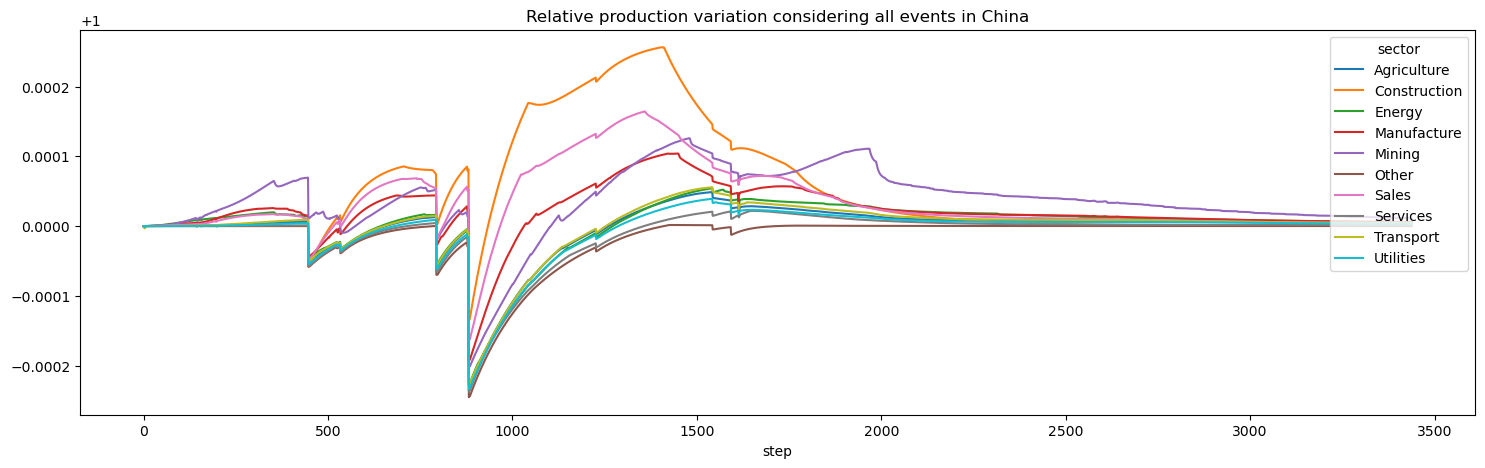

In [54]:
indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"]["production_realised"][-99]
indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]

# Exemple 
indirect_impact_from_all_ev_norm.loc[:,"CHN"].plot(figsize=(18,5), title="Relative production variation considering all events in China")

<Axes: title={'center': 'Relative production variation considering only event 0 in China'}, xlabel='step'>

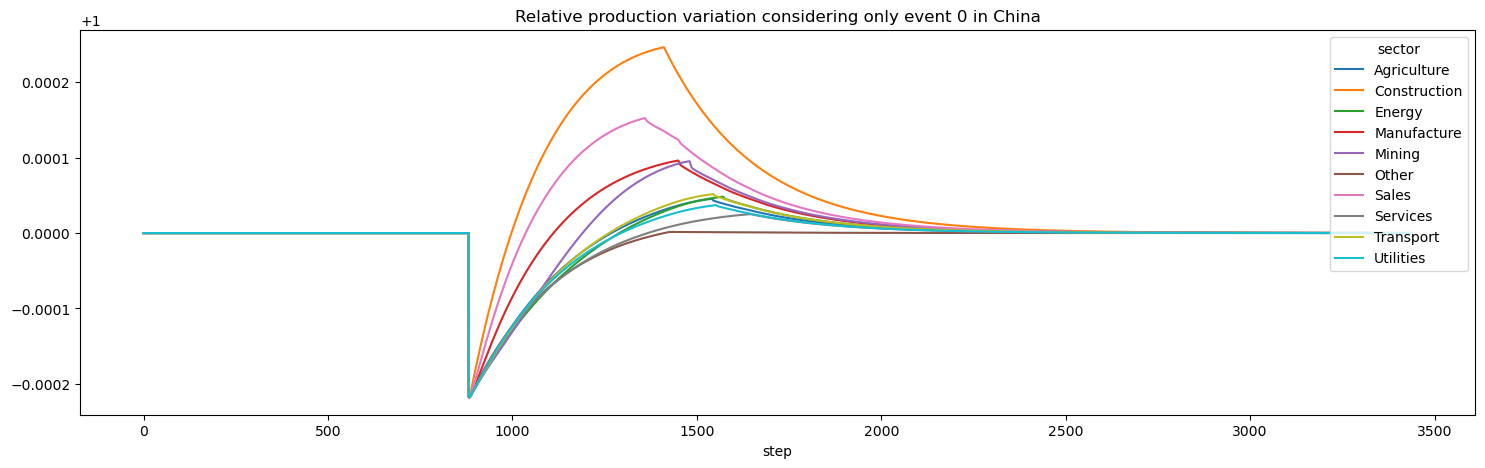

In [65]:
indirect_impact_from_all_ev = results["OECD21-2018"]["9-6"]["production_realised"][15]
indirect_impact_from_all_ev_norm = indirect_impact_from_all_ev / indirect_impact_from_all_ev.loc[0]

# Exemple 
indirect_impact_from_all_ev_norm.loc[:,"CHN"].plot(figsize=(18,5), title="Relative production variation considering only event 0 in China")

### Compute indirect impact generated on an event basis (Aggregated)

```process_res_df()``` returns a DataFrame with indirect impact aggregated over the whole timeserie for a given mriot, invtype, event and variable.

indirect impact is given for all (region,sector) tuples

#### For one specific result :

In [101]:
df_agg = process_res_df(results, sample_n=96, mriot="OECD21-2018", invtype="9-6", event_id=6, var="production_realised")
df_agg

#### For all results :

In [103]:
meta_df_agg = aggregate_results(results,96)

In [135]:
meta_df_agg

region  total indirect impact  sample        MRIOT invtype  event_id  \
0       ARG              36.238981      96  OECD21-2018     9-6       -99   
1       AUS             277.867184      96  OECD21-2018     9-6       -99   
2       AUT              79.921121      96  OECD21-2018     9-6       -99   
3       BEL              90.225114      96  OECD21-2018     9-6       -99   
4       BGR              29.295918      96  OECD21-2018     9-6       -99   
...     ...                    ...     ...          ...     ...       ...   
7231    TUR               3.531343      96  OECD21-2018   90-60         7   
7232    TWN               7.903981      96  OECD21-2018   90-60         7   
7233    USA              47.186928      96  OECD21-2018   90-60         7   
7234    VNM               7.867258      96  OECD21-2018   90-60         7   
7235    ZAF               2.664107      96  OECD21-2018   90-60         7   

                 variable  
0      final_demand_unmet  
1      final_demand_unmet  
2      final_demand_unmet  
3      final_demand_unmet  
4      final_demand_unmet  
...                   ...  
7231  production_realised  
7232  production_realised  
7233  production_realised  
7234  production_realised  
7235  production_realised  

[7236 rows x 7 columns]

### Merging with direct impact:

Preparing direct impact

In [140]:
direct_impact_df = df_impact_countries.copy()
direct_impact_df = direct_impact_df / 10**6 # make it in the same unit as results (M€)
direct_impact_df = direct_impact_df.droplevel(1,axis=0)
direct_impact_df.columns.name = None
direct_impact_df = direct_impact_df.reset_index(names="event_id")
direct_impact_df

event_id  ARG  AUS  AUT  BEL  BGR  BRA  BRN  CAN  CHE  ...  SVK  SVN  SWE  \
0          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5          5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6          6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7          7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8          8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9          9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
10        10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
11        11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
12        12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13        13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
14        14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15        15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
16        16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
17        17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
18        18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
19        19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
20        20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
21        21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
22        22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
23        23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
24        24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
25        25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    THA  TUN  TUR          TWN          USA         VNM  ZAF  
0   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
1   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
2   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
3   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
4   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
5   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
6   0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
7   0.0  0.0  0.0  1057.511105     0.000000    0.000000  0.0  
8   0.0  0.0  0.0     0.000000  1615.607795    0.000000  0.0  
9   0.0  0.0  0.0     0.000000  2295.334972    0.000000  0.0  
10  0.0  0.0  0.0     0.000000     0.000000  554.813954  0.0  
11  0.0  0.0  0.0     0.128500     0.000000    0.000000  0.0  
12  0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
13  0.0  0.0  0.0     0.000000  2284.196193    0.000000  0.0  
14  0.0  0.0  0.0     0.000000     0.000000    7.956276  0.0  
15  0.0  0.0  0.0  1045.232120     0.000000    0.000000  0.0  
16  0.0  0.0  0.0     0.000000   260.703399    0.000000  0.0  
17  0.0  0.0  0.0    50.585936     0.000000    0.000000  0.0  
18  0.0  0.0  0.0   276.740658     0.000000    0.000000  0.0  
19  0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
20  0.0  0.0  0.0   502.965071     0.000000    0.000000  0.0  
21  0.0  0.0  0.0   156.561662     0.000000    0.000000  0.0  
22  0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
23  0.0  0.0  0.0     0.000000   295.545210    0.000000  0.0  
24  0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  
25  0.0  0.0  0.0     0.000000     0.000000    0.000000  0.0  

[26 rows x 68 columns]

Actually merging (+ reordering columns)

In [141]:
final_results = meta_df_agg.merge(direct_impact_df)[["sample","MRIOT","invtype","event_id","variable","region","total indirect impact"]+df_impact_countries.columns.to_list()]

final_results contains the following:

- sample : the sample considered (only the one you are working on at the moment, it is there for later scalability)
- MRIOT : same as above for MRIOT
- invtype : the Inv. Scenario
- event_id : the id of the event considered
- variable : the variable for "total indirect impact" column
- region : region considered for indirect impact
- total indirect impact : total indirect impact (for the event looked at, considering interaction with other event !)
- REGION_NAME : direct impact in REGION_NAME for the event considered

Be carefull when summing rows as the direct impact is duplicated for rows sharing the same event_id

Reminder : 
```
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]
```

In [142]:
final_results.sort_values("total indirect impact")

sample        MRIOT invtype  event_id             variable region  \
2386      96  OECD21-2018   90-60        23  production_realised    MEX   
2252      96  OECD21-2018     9-6        23  production_realised    MEX   
5090      96  OECD21-2018   90-60        10  production_realised    VNM   
4956      96  OECD21-2018     9-6        10  production_realised    VNM   
2930      96  OECD21-2018   90-60         5  production_realised    PHL   
...      ...          ...     ...       ...                  ...    ...   
5279      96  OECD21-2018   90-60         0   final_demand_unmet    ROW   
2422      96  OECD21-2018     9-6        15   final_demand_unmet    CHN   
2556      96  OECD21-2018   90-60        15   final_demand_unmet    CHN   
2185      96  OECD21-2018     9-6        23   final_demand_unmet    MEX   
2319      96  OECD21-2018   90-60        23   final_demand_unmet    MEX   

      total indirect impact  ARG  AUS  AUT  ...  SVK  SVN  SWE  THA  TUN  TUR  \
2386           -2206.113801  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2252           -2142.434240  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
5090            -154.794533  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
4956            -152.624275  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2930            -144.845760  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
5279            3607.038255  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2422            6887.441947  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2556            7127.299572  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2185            7814.965966  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   
2319            7899.761016  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0   

             TWN        USA         VNM  ZAF  
2386     0.00000  295.54521    0.000000  0.0  
2252     0.00000  295.54521    0.000000  0.0  
5090     0.00000    0.00000  554.813954  0.0  
4956     0.00000    0.00000  554.813954  0.0  
2930     0.00000    0.00000    0.000000  0.0  
...          ...        ...         ...  ...  
5279     0.00000    0.00000    0.000000  0.0  
2422  1045.23212    0.00000    0.000000  0.0  
2556  1045.23212    0.00000    0.000000  0.0  
2185     0.00000  295.54521    0.000000  0.0  
2319     0.00000  295.54521    0.000000  0.0  

[6968 rows x 74 columns]

In [145]:
EU_regs_wiod = ["AUT","BEL","BGR","CHE","DEU","DNK","EST","ESP","FIN","FRA","GBR","GRC","HRV","HUN","IRL","ITA","LTU","LUX","LVA","MLT","NLD","NOR","POL","PRT","ROU","SWE","SVN","SVK"]

In [150]:
tmp = final_results.set_index(["sample","MRIOT","invtype","event_id","variable","region"]).loc[pd.IndexSlice[96,"OECD21-2018","90-60",:,"production_realised"]].sort_index()
EU_results = tmp.loc[pd.IndexSlice[:,EU_regs_wiod],:]
EU_results = EU_results.groupby("event_id").agg({k: 'sum' if k == 'total indirect impact' else "first" for k in EU_results.columns})

In [154]:
EU_results.drop(labels=EU_results.columns[(EU_results == 0).all()], axis=1)

total indirect impact          CHN         HKG          JPN  \
event_id                                                                
0                    204.736843     0.000000    0.000000     0.000000   
1                     98.260670     0.000000    0.000000   331.712629   
2                    116.814541     0.000000    0.000000  4422.701381   
3                     67.112193     0.000000    0.000000  2754.127178   
4                     44.986875     0.000000    0.000000   920.484892   
5                     52.181588     0.000000    0.000000     0.000000   
6                     35.821729     0.000000    0.000000     0.000000   
7                     85.051504  2425.131827    0.000000     0.000000   
8                     76.108583     0.000000    0.000000     0.000000   
9                     69.157009     0.000000    0.000000     0.000000   
10                    35.609937    97.546699    0.000000     0.000000   
11                    68.635851   397.700497    0.000000     0.000000   
12                    62.565213  2924.484938  268.478166     0.000000   
13                    92.032293     0.000000    0.000000     0.000000   
14                    77.173677   259.557815    0.000000     0.000000   
15                   308.039464  9078.009505    0.000000     0.000000   
16                    52.316611     0.000000    0.000000     0.000000   
17                    40.121996   252.475702    0.000000     0.000000   
18                    14.164916     0.596989    0.000000     0.000000   
19                    51.863366     0.000000    0.000000   312.985158   
20                    17.143069     0.000000    0.000000     0.186617   
21                    18.492501   251.004264    0.000000     0.000000   
22                    41.614279   454.340259    0.000000     0.000000   
23                   573.649319     0.000000    0.000000     0.000000   
24                   104.047759     0.000000    0.000000  4035.743991   
25                    84.905671     0.000000    0.000000  3406.221481   

               LAO           MEX         PHL          ROW          TWN  \
event_id                                                                 
0         0.000000      0.000000    0.000000  4729.717442     0.000000   
1         0.000000      0.000000    0.000000     0.000000     0.000000   
2         0.000000      0.000000    0.000000     0.000000     0.000000   
3         0.000000      0.000000    0.000000     0.000000     0.000000   
4         0.000000      0.000000    0.000000     2.461526     0.000000   
5         0.000000      0.000000  930.741340   323.989957     0.000000   
6         0.000000      0.000000    0.000000   945.025440     0.000000   
7         0.000000      0.000000    0.000003     0.000000  1057.511105   
8         0.000000    832.778642    0.000000     0.000000     0.000000   
9         0.000000      0.000000    0.000000   810.376403     0.000000   
10        0.000000      0.000000   10.539784     0.000000     0.000000   
11        0.000000      0.000000    1.256070     0.000000     0.128500   
12        0.000000      0.000000    0.375909     0.000000     0.000000   
13        0.000000      0.000000    0.000000     0.000000     0.000000   
14        0.001251      0.000000    5.241299     0.000000     0.000000   
15        0.000000      0.000000    0.000000     0.000000  1045.232120   
16        0.000000      0.000000    0.000000     0.000000     0.000000   
17        0.000000      0.000000    0.000000   255.331802    50.585936   
18        0.000000      0.000000    0.000002     0.000000   276.740658   
19        0.000000      0.000000    0.000000     0.000000     0.000000   
20        0.000000      0.000000    0.000000     0.000000   502.965071   
21        0.000000      0.000000    0.000000     0.000000   156.561662   
22        0.000000      0.000000   26.148383     0.106841     0.000000   
23        0.000000  11580.032736    0.000000     0.880162     0.000000   
24        0.000000      0.000000    0.000

# Graph ideas for the paper

## Graph 1 : Indirect cost relative to direct cost at the global scale

In [105]:
clean_df.head(1)

Sample        MRIOT Inv. Scenario Event interaction ?             Variable  \
0       0  OECD21-2018           9-6                 Yes  Final demand losses   

  Region  Total direct impact (€ Billions)  \
0    ARG                               0.0   

   Total indirect impact (€ Billions)  \
0                            0.100439   

   Sample total direct impact (€ Billions)  \
0                               339.980165   

                                    Affected regions  \
0  [USA, JPN, ROW, CHN, TWN, VNM, KOR, MEX, PHL, ...   

   Relative indirect impact  Cumulated recovery time  \
0                  0.000208                     6502   

   Mean sample shock intensity  Sample number of events  
0                     0.000397                       29

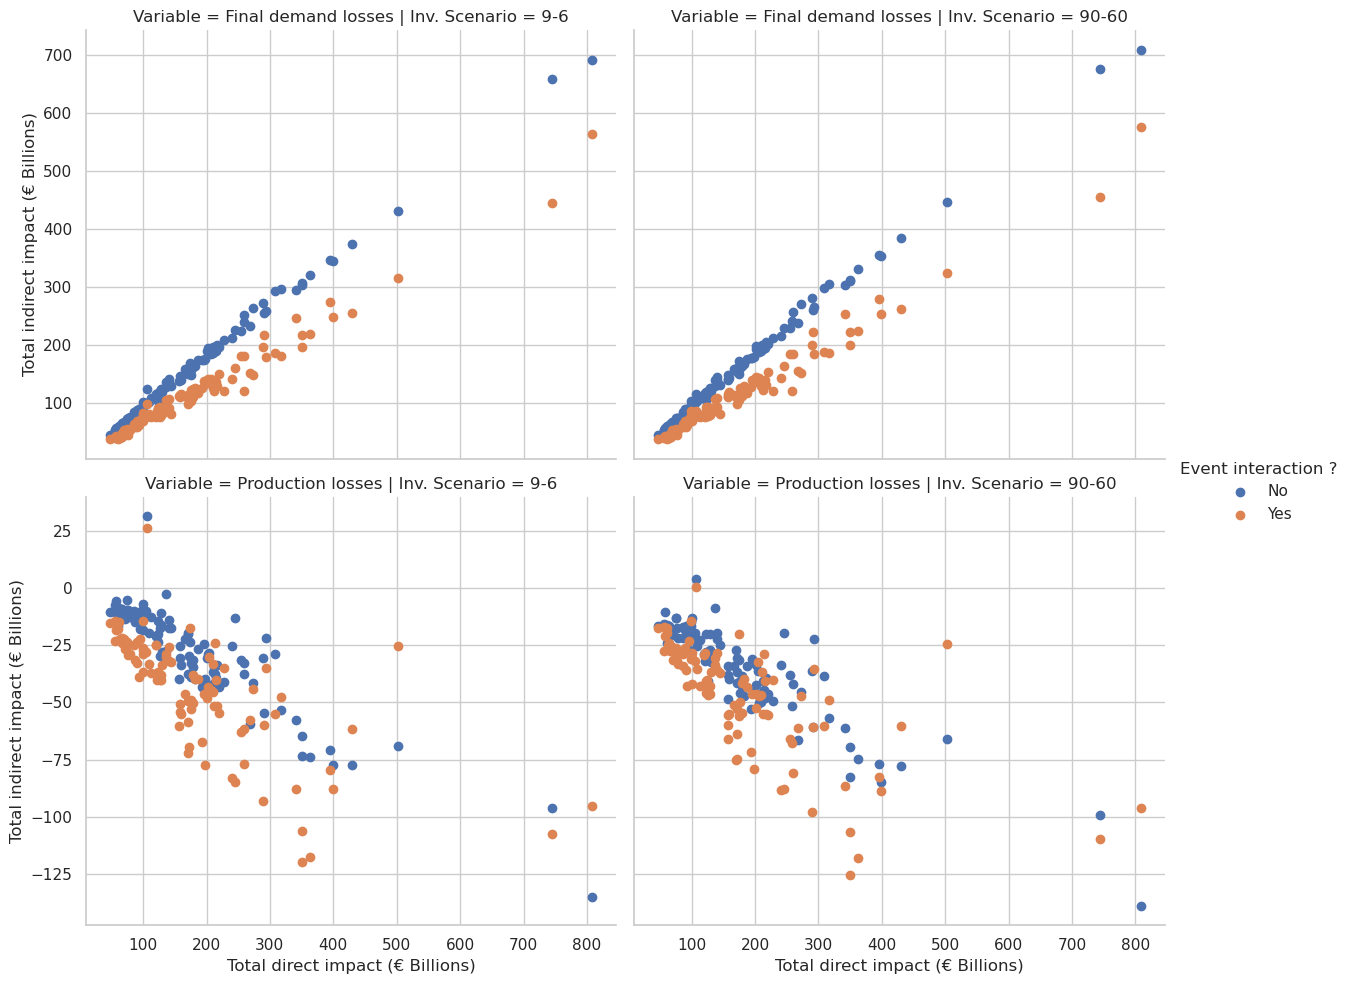

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.groupby(['Sample', 'MRIOT', 'Inv. Scenario', 'Event interaction ?', 'Variable'])[['Total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].sum().reset_index().copy()

# Replace column names
# Set the style of the plot
sns.set(style="whitegrid")

# Create a facet grid plot
g = sns.FacetGrid(df, row="Variable", col="Inv. Scenario", hue="Event interaction ?", sharey="row", aspect=1.2, height=5)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Total direct impact (€ Billions)", "Total indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

## Graphe 1.1 : Indirect cost relative to direct cost at the global scale (Europe only)

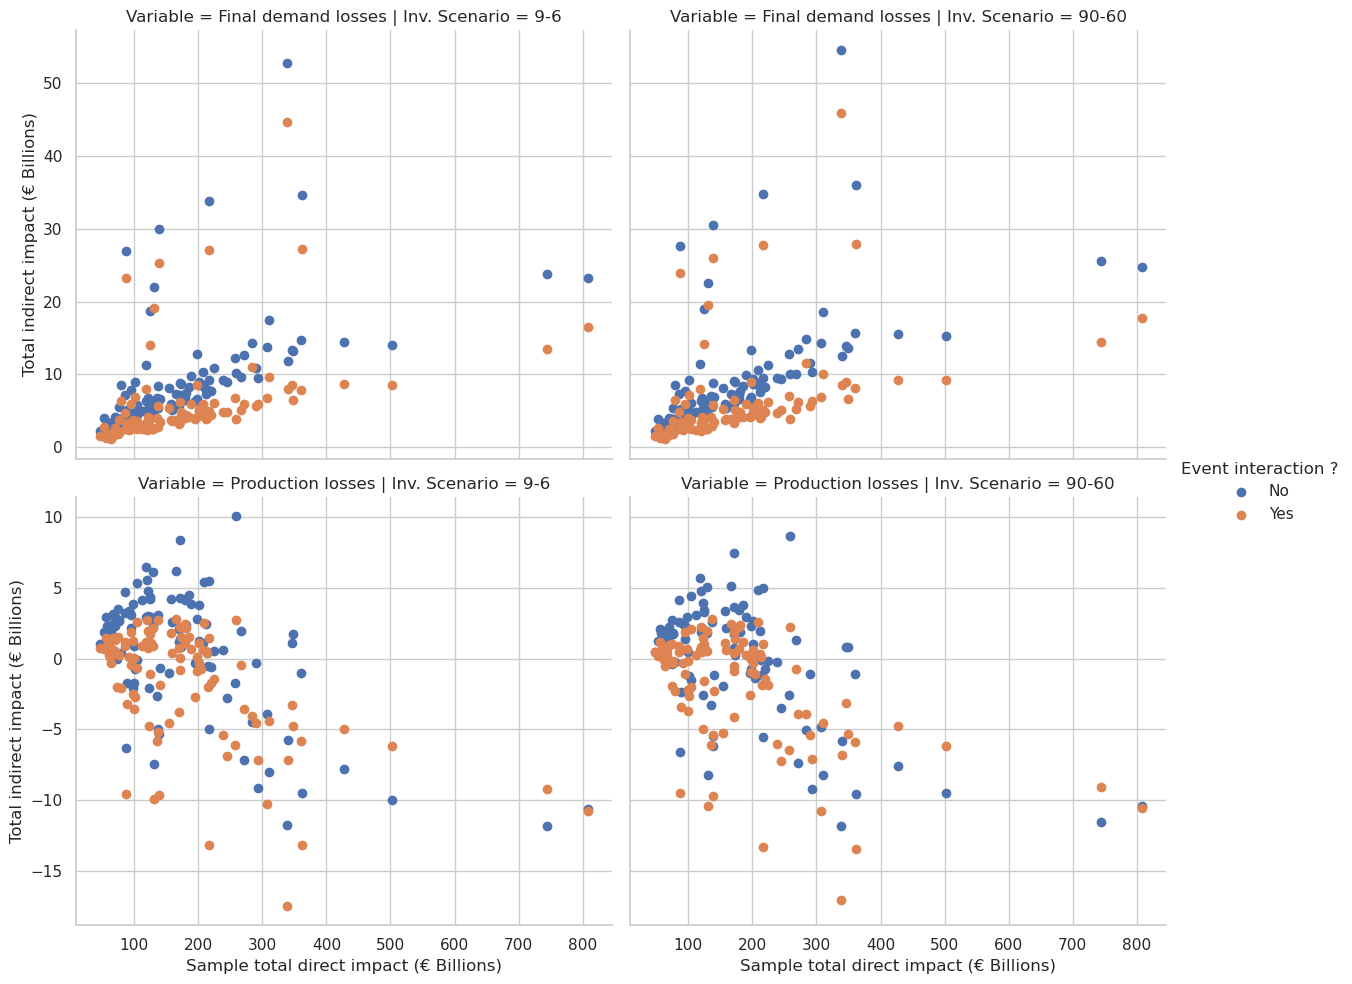

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = clean_df.loc[clean_df["Region"]=="Europe"].groupby(['Sample',
                                                         'MRIOT',
                                                         'Inv. Scenario',
                                                         'Event interaction ?', 
                                                         'Variable']
                                                       )[['Sample total direct impact (€ Billions)', 'Total indirect impact (€ Billions)']].agg({'Sample total direct impact (€ Billions)':"first", 'Total indirect impact (€ Billions)':"sum"}).reset_index().copy()

# Replace column names
# Set the style of the plot
sns.set(style="whitegrid")

# Create a facet grid plot
g = sns.FacetGrid(df, row="Variable", col="Inv. Scenario", hue="Event interaction ?", sharey="row", aspect=1.2, height=5)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Sample total direct impact (€ Billions)", "Total indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()

# Show the plot
plt.show()

## Graphe 2 [WIP] : 

In [58]:
df_direct_impact = pd.read_parquet("../outputs/full_df_impact.parquet").iloc[:,:-2]
df_direct_impact = df_direct_impact.groupby("sample").sum().stack()
df_direct_impact = df_direct_impact.reset_index()
df_direct_impact.rename(columns={0:"Direct_Impact"},inplace=True)
df_direct_impact

sample region  Direct_Impact
0          0    ARG   0.000000e+00
1          0    AUS   0.000000e+00
2          0    AUT   0.000000e+00
3          0    BEL   0.000000e+00
4          0    BGR   0.000000e+00
...      ...    ...            ...
6695      99    TUR   0.000000e+00
6696      99    TWN   3.816522e+09
6697      99    USA   3.614639e+10
6698      99    VNM   7.782986e+08
6699      99    ZAF   0.000000e+00

[6700 rows x 3 columns]

In [88]:
df = res_df.loc[res_df.region=="Europe"].groupby(['sample', 'MRIOT', 'invtype', 'simtype', 'variable'])[['sample total direct damage', 'total indirect impact']].agg({'sample total direct damage':"first", 'total indirect impact':"sum"}).reset_index().copy()
df

sample        MRIOT invtype     simtype            variable  \
0         0  OECD21-2018     9-6  aggregated  final_demand_unmet   
1         0  OECD21-2018     9-6  aggregated   production_losses   
2         0  OECD21-2018     9-6   separated  final_demand_unmet   
3         0  OECD21-2018     9-6   separated   production_losses   
4         0  OECD21-2018   90-60  aggregated  final_demand_unmet   
..      ...          ...     ...         ...                 ...   
795      99  OECD21-2018     9-6   separated   production_losses   
796      99  OECD21-2018   90-60  aggregated  final_demand_unmet   
797      99  OECD21-2018   90-60  aggregated   production_losses   
798      99  OECD21-2018   90-60   separated  final_demand_unmet   
799      99  OECD21-2018   90-60   separated   production_losses   

     sample total direct damage  total indirect impact  
0                  3.399802e+11            7245.072641  
1                  3.399802e+11          -15290.306079  
2                  3.399802e+11           10827.808791  
3                  3.399802e+11          -16244.714070  
4                  3.399802e+11            7985.204284  
..                          ...                    ...  
795                1.241315e+11           -1767.706711  
796                1.241315e+11           14763.782970  
797                1.241315e+11           -4590.920447  
798                1.241315e+11           19510.607903  
799                1.241315e+11           -2290.407874  

[800 rows x 7 columns]

In [125]:
# Merge the two DataFrames on 'Sample'
merged_df = pd.merge(df_direct_impact, df, on='sample')

# Group by 'Region' and aggregate direct impact and indirect impact
agg_df = merged_df.groupby(['sample',"MRIOT","invtype","simtype","variable",'region']).agg({'Direct_Impact': 'sum', 'total indirect impact': 'sum',"sample total direct damage":"first"}).reset_index()

# Sort the DataFrame by 'Direct_Impact'
agg_df = agg_df.sort_values(by='Direct_Impact', ascending=False)
agg_df = agg_df.loc[agg_df.Direct_Impact>0]
agg_df["direct impact share"] = agg_df["Direct_Impact"] / agg_df["sample total direct damage"]
agg_df["ratio"] = agg_df["total indirect impact"] * agg_df["direct impact share"]
agg_df = agg_df.groupby(["MRIOT","invtype","simtype","variable",'region'])[["ratio"]].mean().reset_index()
agg_df = agg_df.sort_values("ratio")

AttributeError: Rectangle.set() got an unexpected keyword argument 'colors'

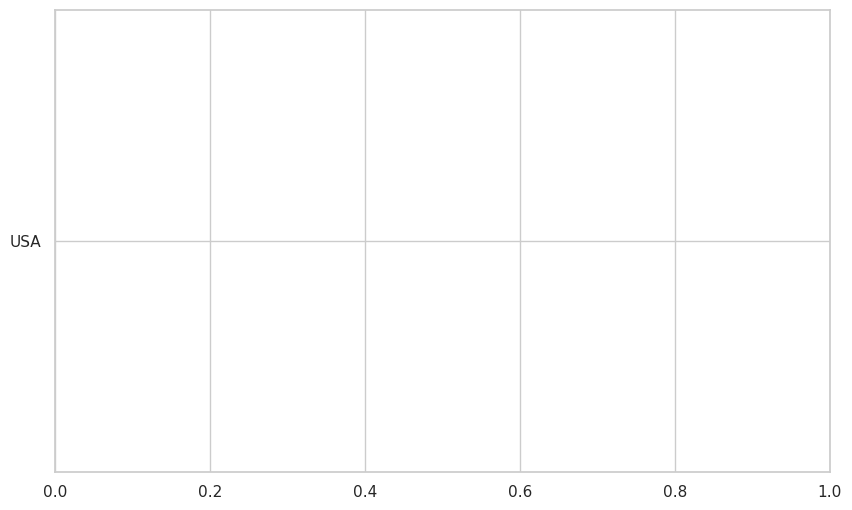

In [138]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(agg_df['region'], agg_df['ratio'], colors=agg_df["variable"], label='Indirect Impact in Europe')
plt.xlabel('Indirect Impact influence')
plt.ylabel('Directly Affected Region')
plt.title('Indirect Impact in Europe by Directly Affected Region')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xscale("symlog")
# Show the plot
plt.show()

# Brouillon exploration

In [ ]:
aggregated_df = res_df[res_df["simtype"] == "aggregated"]
separated_df = res_df[res_df["simtype"] == "separated"]

# Merge aggregated and separated dataframes on specified columns
merged_df = pd.merge(aggregated_df, separated_df, on=["sample", "MRIOT", "invtype", "variable", "region"], suffixes=('','_separated'))

# Calculate the difference and create 'difference' rows
merged_df["total indirect impact"] = merged_df["total indirect impact"] - merged_df["total indirect impact_separated"]
merged_df["simtype"] = "difference"
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_separated')]
merged_df

mask = (merged_df["variable"] == "final_demand_unmet") | (merged_df["variable"] == "production_losses")
# Calculate 'relative indirect impact' based on variable
merged_df.loc[mask, 'relative indirect impact'] = merged_df.loc[mask, 'total indirect impact'] / merged_df.loc[mask, 'region'].map(final_demand_df if 'final_demand_unmet' in merged_df['variable'].values else production_region_df.groupby('region').sum())

# Append the 'difference' rows to the original dataframe
result_df = pd.concat([res_df, merged_df], ignore_index=True)
diff_df = result_df.filter(regex='^(?!.*(_separated|_aggregated)$)')
diff_df

In [ ]:
diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df["total direct impact"]==0) & (diff_df.simtype=="difference")].sort_values(by="relative indirect impact", ascending=False)

In [ ]:
# Set up the grid layout
plt.figure(figsize=(16, 8))

plot_df=diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df.simtype=="difference")].sort_values(by="total indirect impact", ascending=False).copy()
# Set up the grid layout
plot_df["hue"] = plot_df['simtype'].astype(str) + ', ' + plot_df['invtype'].astype(str)
g = sns.FacetGrid(plot_df, col="hue", hue="hue", col_wrap=2, height=4, aspect=2, sharey=False, legend_out=True)

# Plot scatter plots
g.map_dataframe(sns.scatterplot,
                y="total indirect impact",
                x="sample total direct damage")

# Add legend
g.add_legend(loc="upper right")

# Adjust layout
g.tight_layout()

# Show the plot
plt.show()

In [ ]:
diff_df.loc[(diff_df.variable=="production_losses") & (diff_df.region=="Europe") & (diff_df.simtype=="difference")].sort_values(by="relative indirect impact", ascending=False)

In [ ]:
combined_df.loc[(combined_df["sample"]==30)]

In [ ]:
combined_df.loc[(combined_df["sample"]==7)]

In [ ]:
import pandas as pd
import pickle as pkl
import math

def sigmoid_mapping(value, slope, midpoint,
                    start_in_intrvl=0, end_in_intrvl=0.005,
                    start_out_intrvl=-5, end_out_intrvl=5, max_duration=1000):
    """Map interval to sigmoid scaled interval"""
    # Map the input value from [start_in, end_in] to [start_out, end_out]
    normalized_value = (value) / (end_in_intrvl - start_in_intrvl) * (end_out_intrvl - start_out_intrvl) - end_out_intrvl

    # Apply sigmoid function with adjustable slope and midpoint
    shifted_value = normalized_value - midpoint
    sigmoid_result = 1 / (1 + math.exp(-slope * shifted_value))

    # Scale the result to [0, max_duration]
    scaled_result = sigmoid_result * max_duration

    return scaled_result


df_impact = pd.read_parquet("../outputs/EXIOBASE3-2010_df_impact.parquet")
with open("../outputs/sample_0/EXIOBASE3-2010_supchain.pkl","rb") as f:
    supchain = pkl.load(f)
meta_df_impact = df_impact.sum(axis=1).to_frame("total_damage").rename_axis("step")#.reset_index()
meta_df_impact["affected"] = df_impact.apply(lambda row:row[row>0].index.get_level_values(0).unique().to_list(), axis=1)
tmp = (df_impact / supchain.secs_exp.iloc[0]).groupby("region",axis=1).min().stack()
meta_df_impact["mean_shock_intensity"] = tmp.loc[tmp!=0].groupby(level=0).mean()
meta_df_impact["mean_shock_intensity_pct"] = meta_df_impact["mean_shock_intensity"]*100
meta_df_impact["recovery_duration"] = meta_df_impact["mean_shock_intensity"].apply(lambda x : sigmoid_mapping(x,slope=2, midpoint=-3.5)).round().astype(int)


In [ ]:
(df_impact / supchain.secs_exp.iloc[0]).groupby("region",axis=1).min()

In [ ]:
meta_df_impact

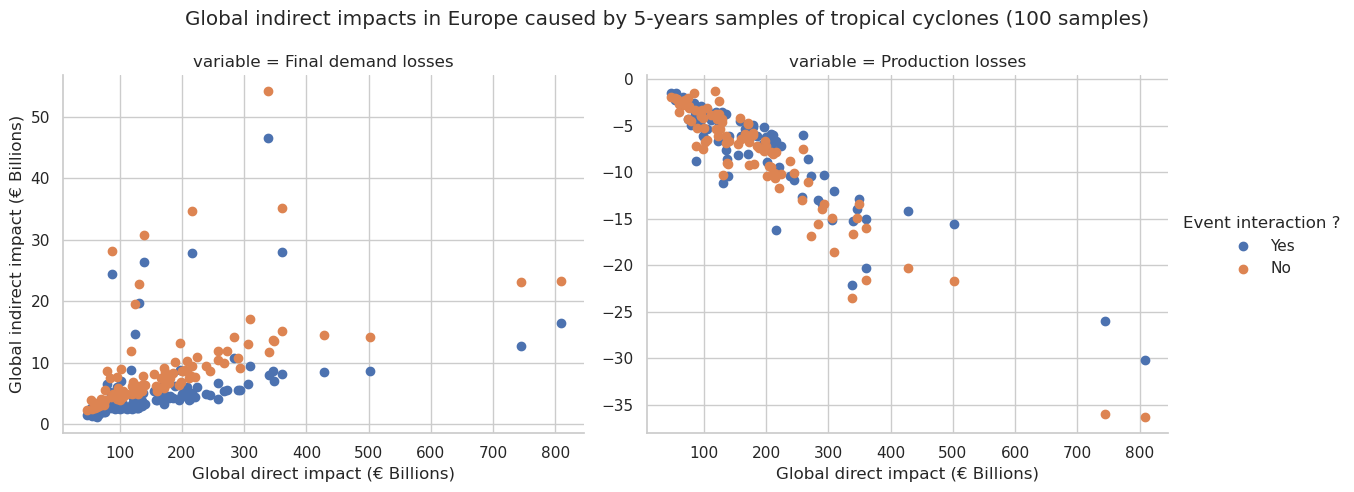

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = res_df.loc[res_df.region=="Europe"].groupby(['sample', 'MRIOT', 'invtype', 'simtype', 'variable'])[['sample total direct damage', 'total indirect impact']].agg({'sample total direct damage':"first", 'total indirect impact':"sum"}).reset_index().copy()

# Replace variable values
df['variable'] = df['variable'].replace({'production_losses': 'Production losses', 'final_demand_unmet': 'Final demand losses'})
df['simtype'] = df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
df = df.rename(columns={'sample total direct damage': 'Global direct impact (€ Billions)', 'total indirect impact': 'Global indirect impact (€ Billions)'})
df['Global direct impact (€ Billions)'] = df['Global direct impact (€ Billions)'] / 1e9  # Divide by 10^9
df['Global indirect impact (€ Billions)'] = df['Global indirect impact (€ Billions)'] / 1e3  # Divide by 10^3
df = df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})

df = df.loc[df["Inv. Scenario"]=="90-60"]
# Set the style of the plot
sns.set(style="whitegrid")

# Create a facet grid plot
g = sns.FacetGrid(df, col="variable", hue="Event interaction ?", sharey=False, aspect=1.2, height=5)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)

# Add a legend
g.add_legend()

g.fig.subplots_adjust(top=0.85) # adjust the Figure in rp
g.fig.suptitle('Global indirect impacts in Europe caused by 5-years samples of tropical cyclones (100 samples)')
# Show the plot
plt.show()

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


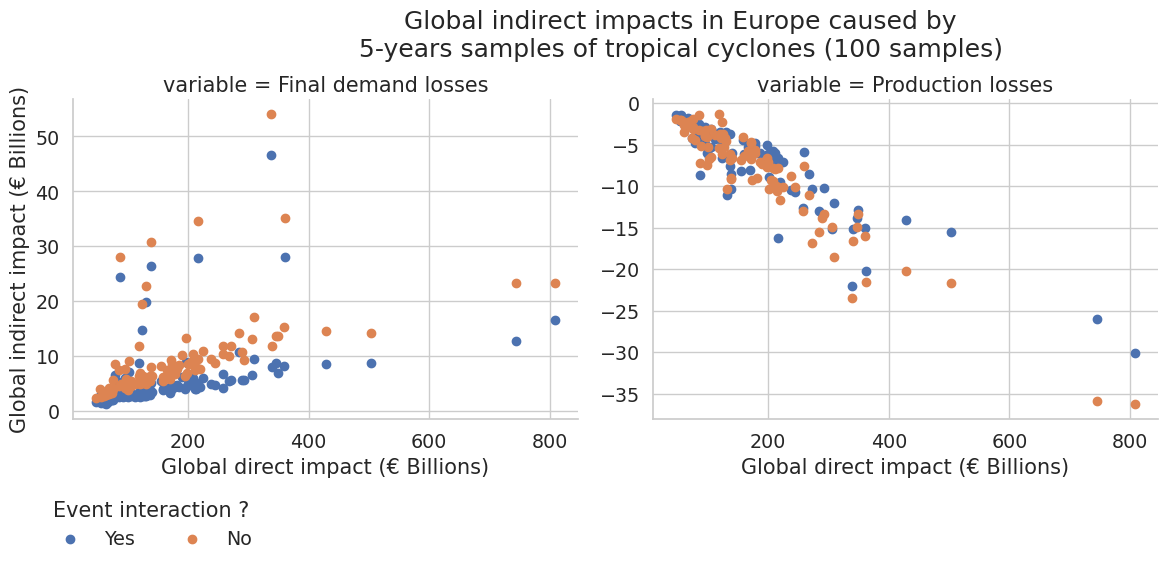

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = res_df.loc[res_df.region=="Europe"].groupby(['sample', 'MRIOT', 'invtype', 'simtype', 'variable'])[['sample total direct damage', 'total indirect impact']].agg({'sample total direct damage':"first", 'total indirect impact':"sum"}).reset_index().copy()

# Replace variable values
df['variable'] = df['variable'].replace({'production_losses': 'Production losses', 'final_demand_unmet': 'Final demand losses'})
df['simtype'] = df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
df = df.rename(columns={'sample total direct damage': 'Global direct impact (€ Billions)', 'total indirect impact': 'Global indirect impact (€ Billions)'})
df['Global direct impact (€ Billions)'] = df['Global direct impact (€ Billions)'] / 1e9  # Divide by 10^9
df['Global indirect impact (€ Billions)'] = df['Global indirect impact (€ Billions)'] / 1e3  # Divide by 10^3
df = df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})

df = df.loc[df["Inv. Scenario"]=="90-60"]

# Set the style of the plot
sns.set(style="whitegrid",font_scale=1.25)
#sns.set_context("talk")

# Create a facet grid plot
g = sns.FacetGrid(df, col="variable", hue="Event interaction ?", sharey=False, aspect=1.2, height=5)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)
#g.set_titles(col_template="Inv. Scenario {col_name}", row_template="{row_name}")
# Add a legend
g.add_legend(ncol=2, bbox_to_anchor=(.21, -.05))
#sns.move_legend(g, "lower center")
g.fig.subplots_adjust(top=0.80) # adjust the Figure in rp
g.fig.suptitle('Global indirect impacts in Europe caused by\n5-years samples of tropical cyclones (100 samples)')

# Show the plot
plt.show()

/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sjuhel/mambaforge-pypy3/envs/versa/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


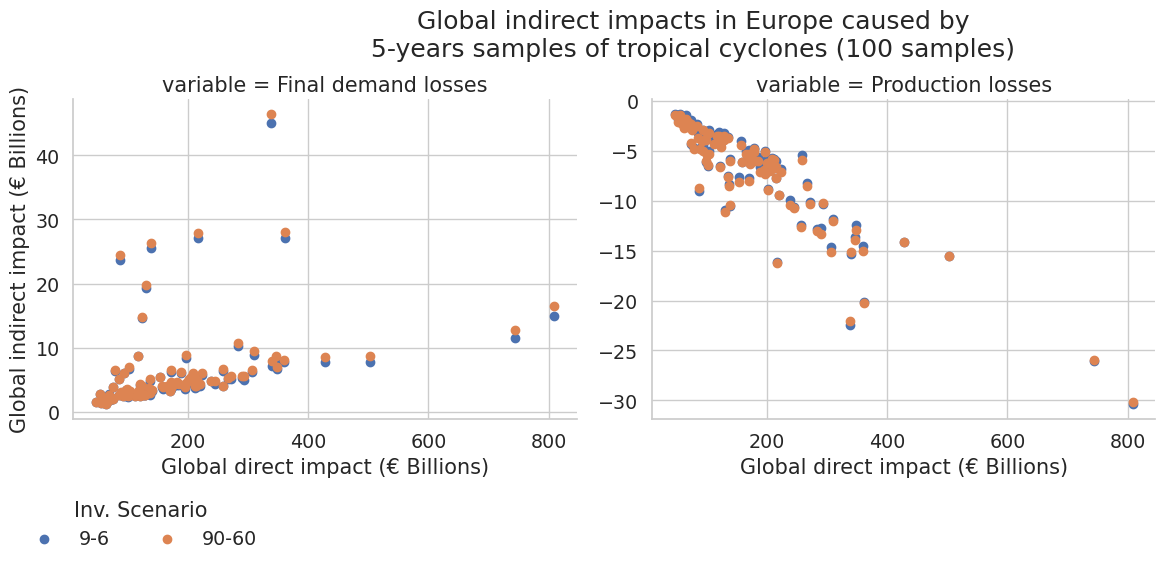

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample DataFrame
df = res_df.loc[res_df.region=="Europe"].groupby(['sample', 'MRIOT', 'invtype', 'simtype', 'variable'])[['sample total direct damage', 'total indirect impact']].agg({'sample total direct damage':"first", 'total indirect impact':"sum"}).reset_index().copy()

# Replace variable values
df['variable'] = df['variable'].replace({'production_losses': 'Production losses', 'final_demand_unmet': 'Final demand losses'})
df['simtype'] = df['simtype'].replace({'aggregated': 'Yes', 'separated': 'No'})

# Replace column names
df = df.rename(columns={'sample total direct damage': 'Global direct impact (€ Billions)', 'total indirect impact': 'Global indirect impact (€ Billions)'})
df['Global direct impact (€ Billions)'] = df['Global direct impact (€ Billions)'] / 1e9  # Divide by 10^9
df['Global indirect impact (€ Billions)'] = df['Global indirect impact (€ Billions)'] / 1e3  # Divide by 10^3
df = df.rename(columns={'invtype': 'Inv. Scenario', 'simtype': 'Event interaction ?'})

df = df.loc[df["Event interaction ?"]=="Yes"]

# Set the style of the plot
sns.set(style="whitegrid",font_scale=1.25)
#sns.set_context("talk")

# Create a facet grid plot
g = sns.FacetGrid(df, col="variable", hue="Inv. Scenario", sharey=False, aspect=1.2, height=5)

# Map the scatter plot on the facet grid
g.map(plt.scatter, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)")

#g.map(sns.regplot, "Global direct impact (€ Billions)", "Global indirect impact (€ Billions)", scatter=False, lowess=True)
#g.set_titles(col_template="Inv. Scenario {col_name}", row_template="{row_name}")
# Add a legend
g.add_legend(ncol=2, bbox_to_anchor=(.21, -.05))
#sns.move_legend(g, "lower center")
g.fig.subplots_adjust(top=0.80) # adjust the Figure in rp
g.fig.suptitle('Global indirect impacts in Europe caused by\n5-years samples of tropical cyclones (100 samples)')

# Show the plot
plt.show()